## EVALUATION PROJECT | PHASE - 3 | PROJECT - 1
# ZOMATO RESTAURANT PROJECT
#### FlipRoboTechnology | Batch - DS2301 | Submitted By :- Neha Vibhor Mittal

## DATASET INFORMATION -

#### Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.

#### Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

### Data Storage:
This problem statement contains two datasets-  `'Zomato.csv'` and `'country_code.csv'`.
Country_code.csv contains two variables:
#### `1- Country code`
#### `2- Country name`

#### - This dataset is available on :-
    
- 'https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx'
- 'https://github.com/dsrscientist/dataset4/blob/main/zomato.csv'

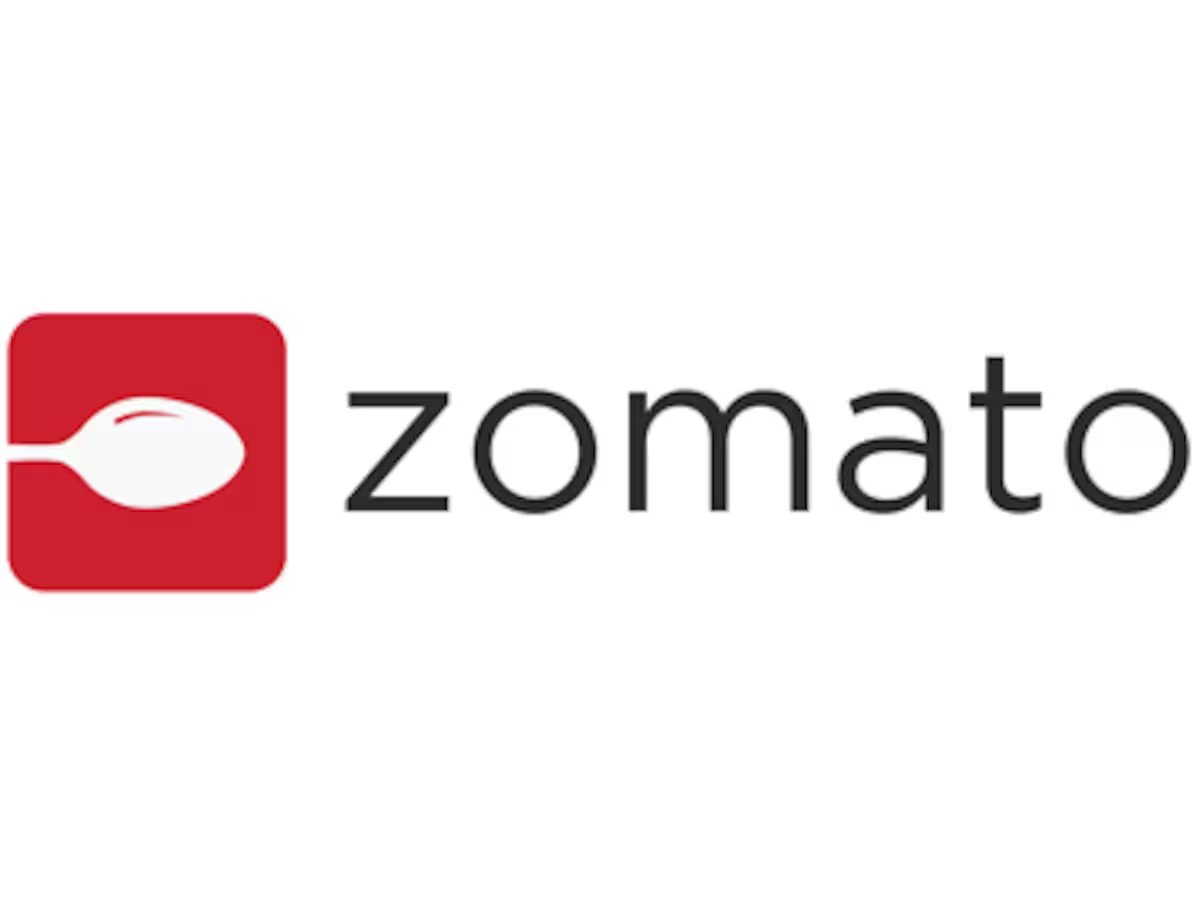

In [1]:
from IPython.display import Image,display
Image(filename =r"C:\Users\nehas\Downloads\ZOMATO-logo.png")

## LABELS / ATTRIBUTE INFORMATION :-

 Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
 
- `Restaurant Id`: Unique id of every restaurant across various cities of the world

- `Restaurant Name`: Name of the restaurant

- `Country Code`: Country in which restaurant is located

- `City`: City in which restaurant is located

- `Address`: Address of the restaurant

- `Locality`: Location in the city

- `Locality Verbose`: Detailed description of the locality

- `Longitude`: Longitude coordinate of the restaurant's location

- `Latitude`: Latitude coordinate of the restaurant's location

- `Cuisines`: Cuisines offered by the restaurant

- `Average Cost for two`: Cost for two people in different currencies

- `Currency`: Currency of the country

- `Has Table booking`: yes/no

- `Has Online delivery`: yes/ no

- `Is delivering`: yes/ no

- `Switch to order menu`: yes/no

- `Price range`: range of price of food

- `Aggregate Rating`: Average rating out of 5

- `Rating color`: depending upon the average rating color

- `Rating text`: text on the basis of rating of rating

- `Votes`: Number of ratings casted by people

## PROBLEM IDENTIFICATION -

In this dataset predict 2 things –

`1)Average Cost for two`
`2)Price range`

## TARGET VARIABLE :-

- 1)Average Cost for two
- 2)Price range 

## TOOLS USED :

The following tools are going to be used for data analysis;

- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-learn

## IMPORTING NECESSARY LIBRARIES-

In [2]:
!pip install folium

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import folium

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

z1 = pd.read_excel('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Country-Code.xlsx')
z2 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',engine='python',encoding="ISO-8859-1")
     

#### Here encoding="ISO-8859-1  is a family of single-byte encoding schemes used to represent alphabets that can be represented within the range of 127 to 255. These various alphabets are defined as "parts" in the format ISO-8859-n, the most familiar of these likely being ISO-8859-1 aka 'Latin-1'. As with UTF-8, 7-bit-safe ASCII remains unaffected regardless of the encoding family used.

#### So as we noticed ,there are 2 dataset available - Country codes with Country names and the resturant dataset. Let try to merge both this dataset , to get a final dataset.

In [3]:
# Merging the dataset

zomato = pd.merge(z1,z2)
zomato.head(3)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


# Exploratory Data Analysis (EDA)

## Data PreProcessing

In [4]:
# Checking the sample dataset

pd.set_option('display.max_columns',None)

zomato.sample(5)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7844,1,India,7956,Mad Over Donuts,Noida,"J-52,Ground Floor, Main Market, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.324238,28.568278,Desserts,450,Indian Rupees(Rs.),No,Yes,No,No,1,4.2,Green,Very Good,235
7348,1,India,349,"34, Chowringhee Lane",New Delhi,"G-37, Ground Floor, Westend Mall, Janakpuri, N...","West End Mall, Janak Puri","West End Mall, Janak Puri, New Delhi",77.080281,28.629900,Fast Food,350,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,86
8737,37,Canada,16643459,Consort Restaurant,Consort,"4931 50th Street, Consort, AB T0C 1B0",Consort,"Consort, Consort",-110.774699,52.008289,"Chinese, Canadian",25,Dollar($),No,No,No,No,2,3.0,Orange,Average,6
8005,1,India,307424,City Hut,Noida,"Near HP Petrol Pump, Main Dadri Road, Sector 4...",Sector 41,"Sector 41, Noida",77.359153,28.561518,"North Indian, Chinese",700,Indian Rupees(Rs.),No,No,No,No,2,2.5,Orange,Average,27
7110,1,India,3507,Subway,New Delhi,"G-10/A, Ground Floor, Vasant Square Mall, Vasa...","Vasant Square Mall, Vasant Kunj","Vasant Square Mall, Vasant Kunj, New Delhi",77.156163,28.525068,"American, Fast Food, Salad, Healthy Food",500,Indian Rupees(Rs.),No,Yes,No,No,2,2.5,Orange,Average,131


In [5]:
# Checking the dimension of z1 

z1.shape

(15, 2)

#### - There are 15 rows and 2 columns in z1 data.

In [6]:
# Checking the dimension of z2

z2.shape

(9551, 21)

#### - There are 9551 rows and 21 columns in z2 data.

In [7]:
# Checking the features present in z1

z2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
# Checking the dimension of the zomato dataset(merged z1 and z2)

zomato.shape

(9551, 22)

#### - There are 9551 rows and 22 columns in our data.

In [9]:
# Checking the features present in the dataset

zomato.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### - These are the list of 22 columns present in zomato dataset.

In [10]:
# Checking for any duplicate rows present in the dataset

dup = zomato[zomato.duplicated()]
dup.shape

(0, 22)

In [11]:
#Checking the data types of all the features-

zomato.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

#### - There are 22 attributes with contains (5)integer,(14) object and (3) float datatypes.Both of our target variable  Average Cost for two and Price range are integer datatype which indicates that this is a regression problem .

In [12]:
# Checking the information about the dataset

zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

## KEY OBSERVATIONS -
- There are 9551 entries and 22 attributes in this dataset.
- The second column give us an idea about how big the dataset and how many non-null values are there for each field.
- All the features except 'Cuisines' have non null values present in it.
- Here we can see that 'Cuisines' has 9542 values which means that there is Missing valuesprsent in this column.
- There are three datatype present in dataset float64,int64 and object datatypes.
- The total memory usage is -1.7+MB

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


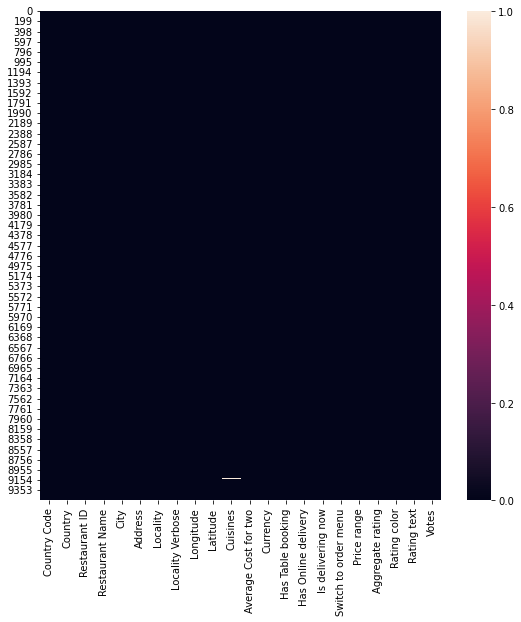

In [13]:
# Checking for missing values in the dataset-
    
plt.figure(figsize=[9,9])
sns.heatmap(zomato.isnull())

print(zomato.isna().sum())

#### - There is 9 null values present in the feature 'Cuisines'.

In [14]:
#checking the unique values present in the columns 'Cuisines'

zomato['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Coffee and Tea, Desserts, Beverages', 'Sandwich, Sushi, Tapas',
       'Burger, Greek, Sandwich'], dtype=object)

In [15]:
# Drop the null values & Check for null values

zomato.dropna(subset = ['Cuisines'],inplace = True)
zomato.isnull().sum()


Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### - Finally , removed all the missing values from the dataset.

In [16]:
#Checking the nunique values 

zomato.nunique().to_frame('Number of unique values')

,Number of unique values
Country Code,15
Country,15
Restaurant ID,9542
Restaurant Name,7437
City,140
Address,8910
Locality,1206
Locality Verbose,1263
Longitude,8111
Latitude,8668


### KEY INSIGHTS-

- There are 7437 restaurants are on zomato
- zomato's presence in 140 cities across 15 countries
- There are 1825 types of cuisines available on zomato
- Also accept payments in 12 type of currencies

In [17]:
#checking the value count for each columns

for col in zomato.columns:   
    print('-' * 50 + col + '-' * 50 , end=' - ')
    display(zomato[col].value_counts().head())

--------------------------------------------------Country Code-------------------------------------------------- - 

1      8652
216     425
215      80
30       60
189      60
Name: Country Code, dtype: int64

--------------------------------------------------Country-------------------------------------------------- - 

India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
Name: Country, dtype: int64

--------------------------------------------------Restaurant ID-------------------------------------------------- - 

3400025     1
18423129    1
18157391    1
18469968    1
18292083    1
Name: Restaurant ID, dtype: int64

--------------------------------------------------Restaurant Name-------------------------------------------------- - 

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

--------------------------------------------------City-------------------------------------------------- - 

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

--------------------------------------------------Address-------------------------------------------------- - 

Sector 41, Noida                                                       11
Dilli Haat, INA, New Delhi                                             11
Greater Kailash (GK) 1, New Delhi                                      10
The Imperial, Janpath, New Delhi                                        9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi     8
Name: Address, dtype: int64

--------------------------------------------------Locality-------------------------------------------------- - 

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Malviya Nagar       85
Name: Locality, dtype: int64

--------------------------------------------------Locality Verbose-------------------------------------------------- - 

Connaught Place, New Delhi    122
Rajouri Garden, New Delhi      99
Shahdara, New Delhi            87
Defence Colony, New Delhi      86
Pitampura, New Delhi           85
Name: Locality Verbose, dtype: int64

--------------------------------------------------Longitude-------------------------------------------------- - 

0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
Name: Longitude, dtype: int64

--------------------------------------------------Latitude-------------------------------------------------- - 

0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
Name: Latitude, dtype: int64

--------------------------------------------------Cuisines-------------------------------------------------- - 

North Indian             936
North Indian, Chinese    511
Fast Food                354
Chinese                  354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

--------------------------------------------------Average Cost for two-------------------------------------------------- - 

500    900
300    897
400    857
200    687
600    652
Name: Average Cost for two, dtype: int64

--------------------------------------------------Currency-------------------------------------------------- - 

Indian Rupees(Rs.)    8652
Dollar($)              473
Pounds(£)              80
Brazilian Real(R$)      60
Rand(R)                 60
Name: Currency, dtype: int64

--------------------------------------------------Has Table booking-------------------------------------------------- - 

No     8384
Yes    1158
Name: Has Table booking, dtype: int64

--------------------------------------------------Has Online delivery-------------------------------------------------- - 

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

--------------------------------------------------Is delivering now-------------------------------------------------- - 

No     9508
Yes      34
Name: Is delivering now, dtype: int64

--------------------------------------------------Switch to order menu-------------------------------------------------- - 

No    9542
Name: Switch to order menu, dtype: int64

--------------------------------------------------Price range-------------------------------------------------- - 

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

--------------------------------------------------Aggregate rating-------------------------------------------------- - 

0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
Name: Aggregate rating, dtype: int64

--------------------------------------------------Rating color-------------------------------------------------- - 

Orange        3734
White         2148
Yellow        2096
Green         1078
Dark Green     300
Name: Rating color, dtype: int64

--------------------------------------------------Rating text-------------------------------------------------- - 

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Name: Rating text, dtype: int64

--------------------------------------------------Votes-------------------------------------------------- - 

0    1094
1     483
2     327
3     244
4     207
Name: Votes, dtype: int64

In [18]:
# Now lets check how many outlets are on Zomato

zomato['Restaurant Name'].value_counts()

Cafe Coffee Day                83
Domino's Pizza                 79
Subway                         63
Green Chick Chop               51
McDonald's                     48
                               ..
Cafe on 3 - Holiday Inn         1
Viva Deli - Holiday Inn         1
Rang De Basanti Urban Dhaba     1
Lord of the Drinks Meadow       1
Fishpatrick's Crabby Cafe       1
Name: Restaurant Name, Length: 7437, dtype: int64

## DROPPING UNNECESSARY COLUMNS -

In [19]:
# Dropping features Restaurant ID, Locality, Switch to order menu, Rating color, Address, Country Code

zomato.drop(['Restaurant ID','Locality','Switch to order menu','Rating color','Address','Country Code'],axis=1,inplace=True)

In [20]:
# Dropping null values from the feature Cuisines

zomato = zomato.dropna()

In [21]:
# Checking the dimension of the dataset

zomato.shape

(9542, 16)

In [22]:
# Splitting the dataset into Categorical and Numerical

zomato_cat=[]

for i in zomato.columns:
    if zomato[i].dtypes == 'object':
        zomato_cat.append(i)
        
zomato_num=[]

for i in zomato.columns:
    if zomato[i].dtypes != 'object':
        zomato_num.append(i)
        
print('Categorical_Columns',zomato_cat)
print('Numerical_Columns',zomato_num)

Categorical_Columns ['Country', 'Restaurant Name', 'City', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']
Numerical_Columns ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


## STATISTICAL SUMMARY -

In [23]:
#Checking the statistical summaryy of the numerical data .

zomato[zomato_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,9542.0,64.274997,41.197602,-157.948486,77.081565,77.192031,77.282043,174.832089
Latitude,9542.0,25.848532,11.010094,-41.330428,28.478658,28.570444,28.642711,55.976980
Average Cost for two,9542.0,1200.326137,16128.743876,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9542.0,1.804968,0.905563,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9542.0,2.665238,1.516588,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9542.0,156.772060,430.203324,0.000000,5.000000,31.000000,130.000000,10934.000000


## KEY OBSERVATIONS-

- The count of each column is equal which indicates that there is no missing or null value present and its a balanced dataset.
- The mean of 'Average Cost for two' and 'Votes' column is higher than the 50% (median) of that column indicating the columns are right skewed.
- The mean of 'Longitude','Latitude','Price range'and 'Aggregate rating' column is lower than the 50% (median) of that column indicating the columns are left skewed.
- The standard deviation of 'Longitude','Average Cost for two' and 'Votes' column is very high indicating the dataset is highly spreaded.
- The difference between 75% and max value in 'Longitude','Latitude','Average Cost for two' and 'Votes' is very high indicatng the presence of outliers.

In [24]:
#Checking the statistical summaryy of the categorical data .

zomato[zomato_cat].describe().T

,count,unique,top,freq
Country,9542,15,India,8652
Restaurant Name,9542,7437,Cafe Coffee Day,83
City,9542,140,New Delhi,5473
Locality Verbose,9542,1263,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9542,12,Indian Rupees(Rs.),8652
Has Table booking,9542,2,No,8384
Has Online delivery,9542,2,No,7091
Is delivering now,9542,2,No,9508
Rating text,9542,6,Average,3734


## KEY OBSERVATIONS -

- India constitutes maximum data observations for Zomato Restaurants where New Delhi has the highest number of restaraunts associated with Zomato.
- Cafe Coffee Day has maximum number of restaurants/outlets associated with Zomato .
- Restaurants providing only North-Indian cuisines are the highest in number with count of approximate 936.
- In New Delhi, Connaught Place(122) is the top locality where Zomato is functioning appropriately.
-  Majority of people in zomato restuarant has table booked as compared to online delivery .
- The 'Switch to order menu' has single value (NO) for all the observations and hence it will be better to drop this column as this will not give any impact to the data.

In [25]:
# Checking the table booking

zomato[zomato["Has Table booking"]=="Yes"].groupby("Country").size()

Country
India             1111
Phillipines         14
Qatar                1
South Africa         2
UAE                 18
United Kingdom      12
dtype: int64

#### - Zomato has Table booking system in India, Phillipines, Qatar,South Africa,UAE and United Kingdom only.

In [26]:
# Checking the Online delivery .

zomato[zomato["Has Online delivery"]=="Yes"].groupby("Country").size()

Country
India    2423
UAE        28
dtype: int64

#### - Zomato has online delivery system with only India and UAE.

In [27]:
#Extracting the country who gave the most no. of zero rating 

zero_rating=zomato[zomato["Aggregate rating"]==0].groupby("Country").size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})
zero_rating

,Country,Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


#### - As we can see the most number of zero was rated by Indian citizens .

In [28]:
# Lets find out the Country wise currency

zomato.groupby(["Currency","Country"]).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,425
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [29]:
zomato[["Currency","Country"]].groupby(["Currency","Country"]).count().reset_index()

,Currency,Country
0,Botswana Pula(P),Phillipines
1,Brazilian Real(R$),Brazil
2,Dollar($),Australia
3,Dollar($),Canada
4,Dollar($),Singapore
5,Dollar($),United States
6,Emirati Diram(AED),UAE
7,Indian Rupees(Rs.),India
8,Indonesian Rupiah(IDR),Indonesia
9,NewZealand($),New Zealand


# Data Visualization

## Univariate Analysis

<AxesSubplot:>

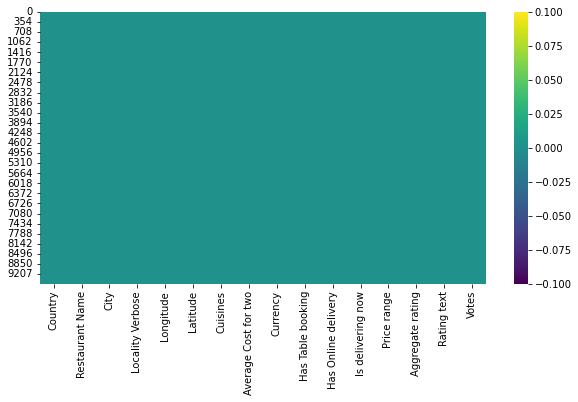

In [30]:
# Visualizing the dataset in heatmap

plt.figure(figsize=(10,5))
sns.heatmap(zomato.isnull(),cmap='viridis')

#### Above heatmap shows there are no null values present in the dataset

<AxesSubplot:xlabel='Restaurant Name', ylabel='Count'>

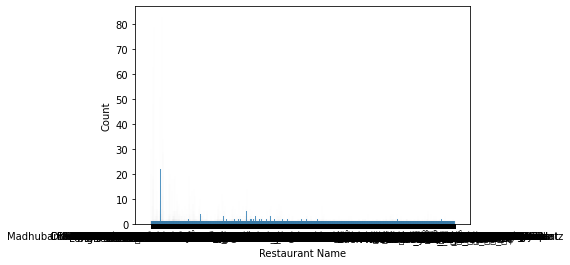

In [31]:
# Visualizing the feature 'Restaurant Name' in countplot

sns.histplot(zomato['Restaurant Name'])


<AxesSubplot:xlabel='City', ylabel='Count'>

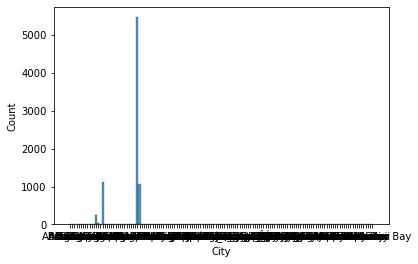

In [33]:
sns.histplot(zomato['City'])

<AxesSubplot:xlabel='Longitude', ylabel='Count'>

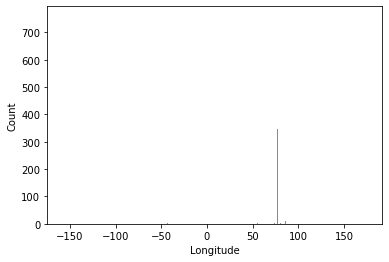

In [34]:
sns.histplot(zomato['Longitude'])

<AxesSubplot:xlabel='Latitude', ylabel='Count'>

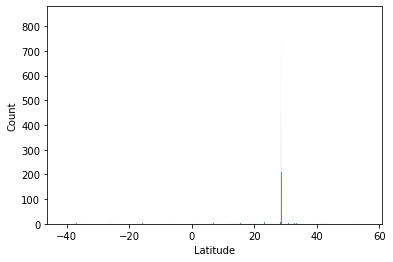

In [35]:
sns.histplot(zomato['Latitude'])

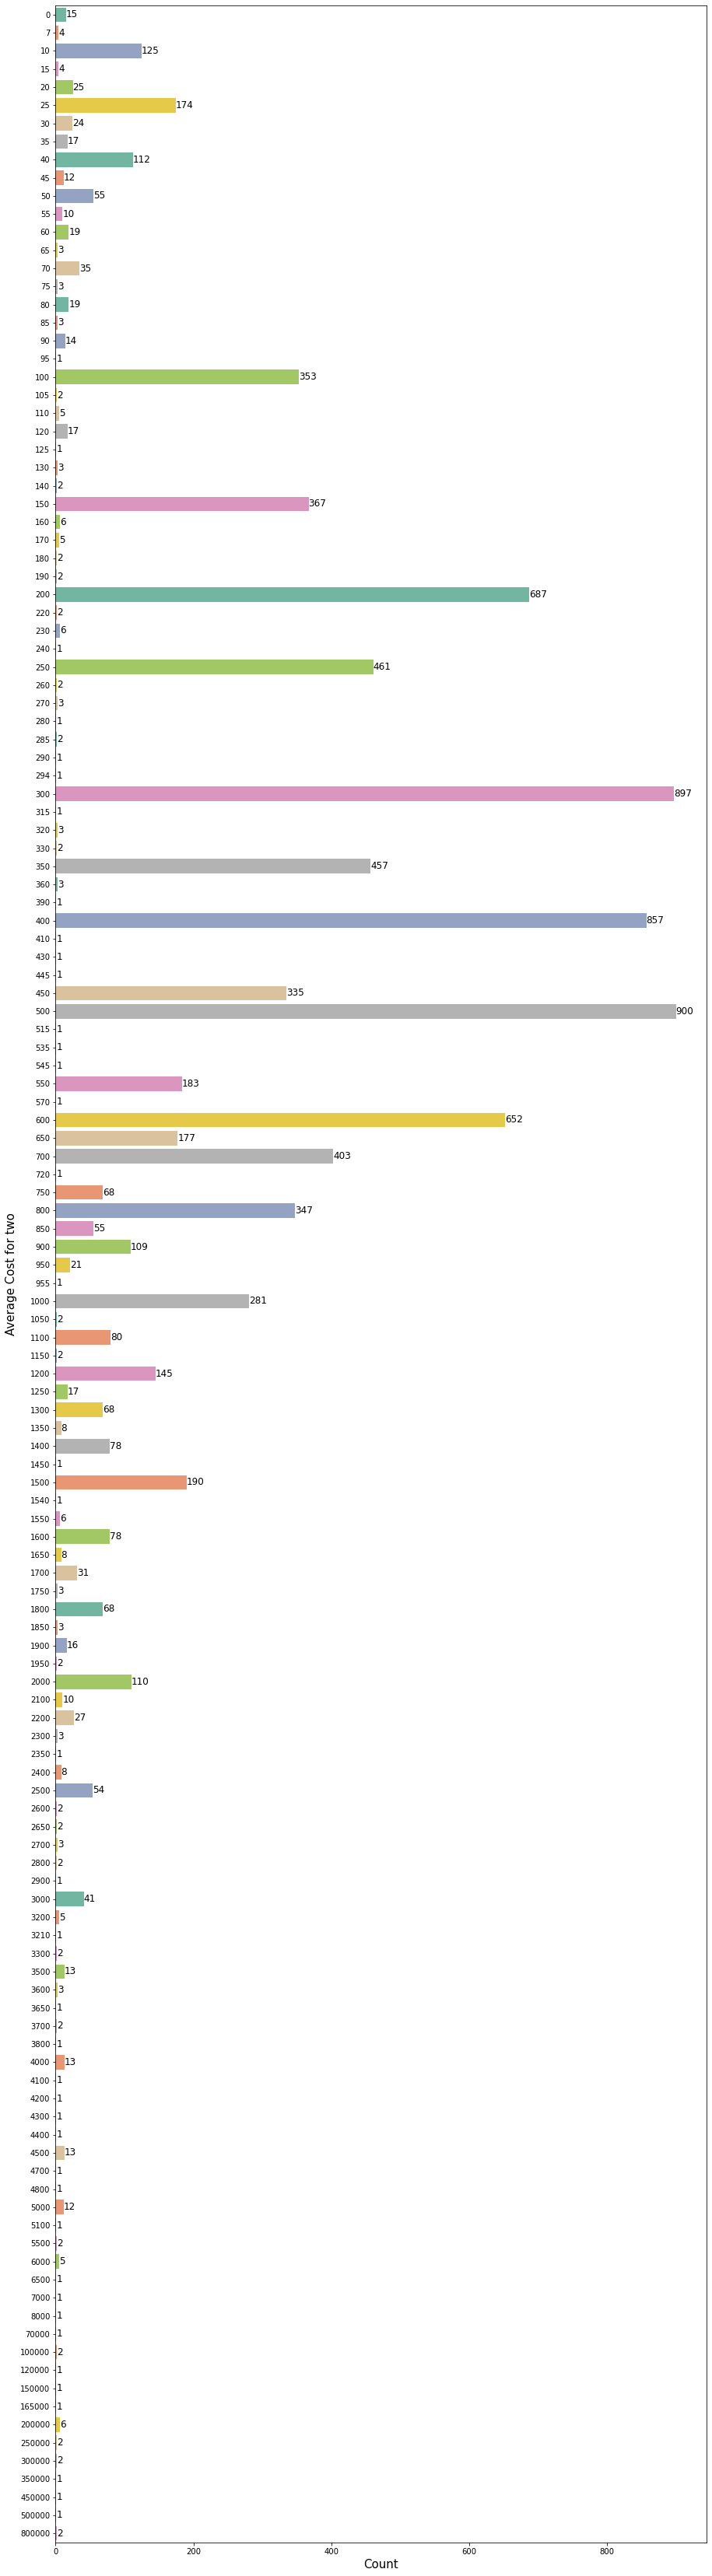

In [46]:
# Visualizing the feature 'Average Cost for two' in countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=zomato['Average Cost for two'],palette='Set2')
plt.ylabel('Average Cost for two',fontsize=15)
plt.xlabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

#### 'Average cost for two' count is maximum in 500, 300 and 400,  currency differs in each country based on their value

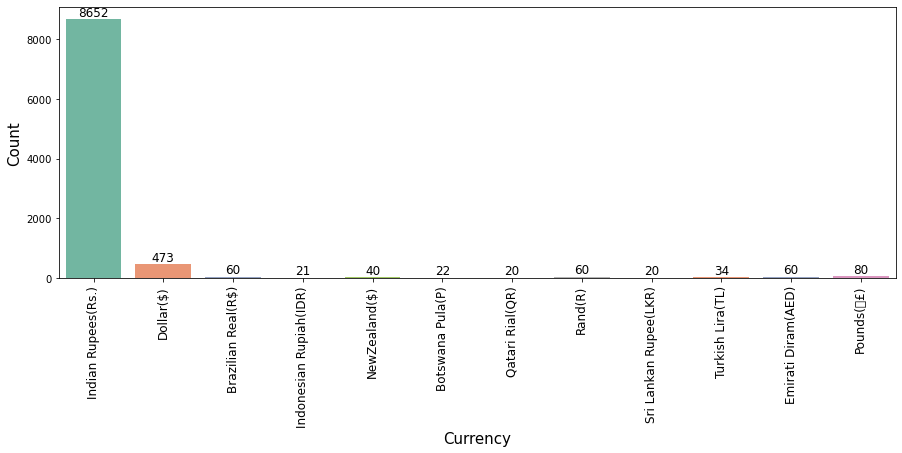

In [37]:
# Visualizing the feature 'Currency' in countplot

plt.figure(figsize=(15,5))
ab = sns.countplot(zomato['Currency'],palette='Set2')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Currency',fontsize=15)
plt.xticks(fontsize=12,rotation=90)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()


#### In terms of Currency, count of Indian Rupee is maximum, as the documented restaurants are maximum in India.

<AxesSubplot:xlabel='Has Table booking', ylabel='Count'>

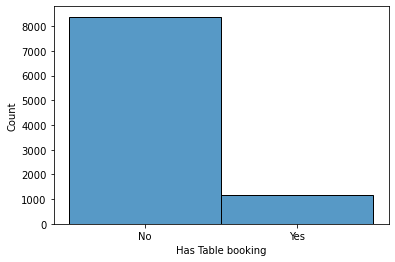

In [38]:
# Visualizing the feature 'Has Table booking' in countplot

sns.histplot(zomato['Has Table booking'])

#### Based on the feature 'Has Table booking', almost 88% of restaurants dont have the option of booking table

<AxesSubplot:xlabel='Has Online delivery', ylabel='Count'>

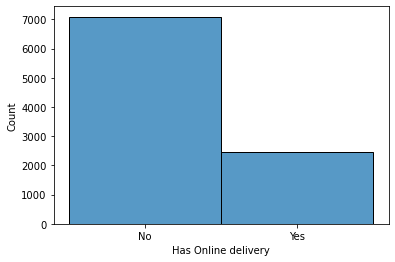

In [39]:
# Visualizing the feature 'Has Online delivery' in countplot
sns.histplot(zomato['Has Online delivery'])


#### Based on the feature 'Has Online delivery', almost 75% of restaurants dont have the option of  Online delivery

<AxesSubplot:xlabel='Is delivering now'>

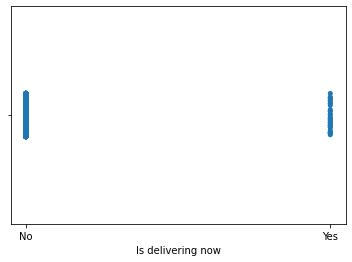

In [41]:
sns.stripplot(zomato['Is delivering now'])


#### The number of Count ‘No’ is maximum in the feature 'Is delivering now'

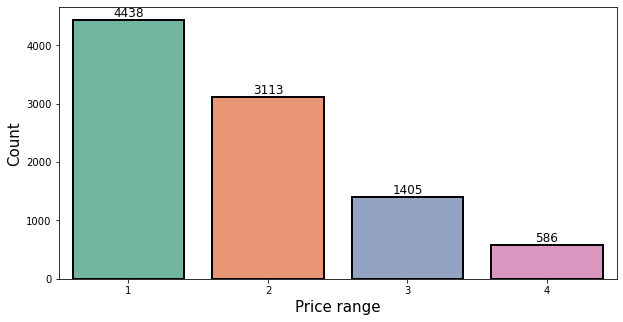

In [42]:
plt.figure(figsize=(10,5))
ab = sns.countplot(zomato['Price range'],palette='Set2',linewidth=2,edgecolor='black')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Price range',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()


#### Restaurants with Price Range as 1 is maximum, followed by 2, 3 and 4.

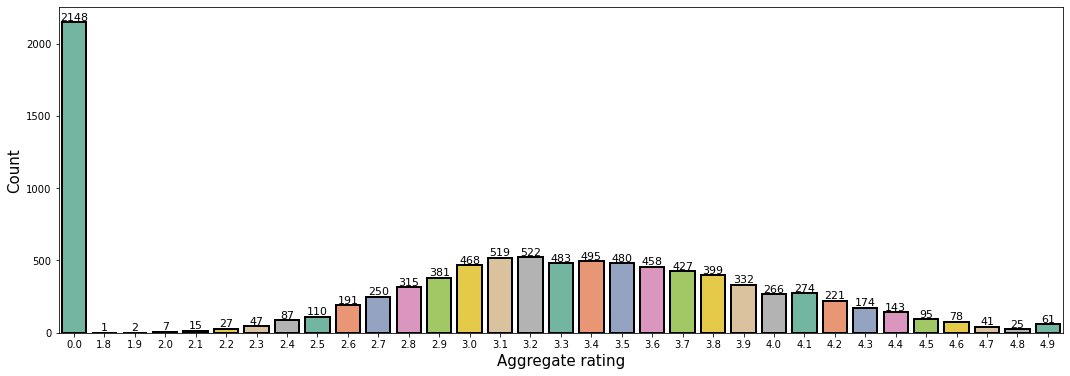

In [43]:
# Visualizing the feature 'Aggregate rating' in countplot

plt.figure(figsize=(18,6))
ab = sns.countplot(zomato['Aggregate rating'],palette='Set2',linewidth=2,edgecolor='black')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Aggregate rating',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=11)
plt.show()

#### In Aggregate Rating column,  rating of 0 has the maximum count

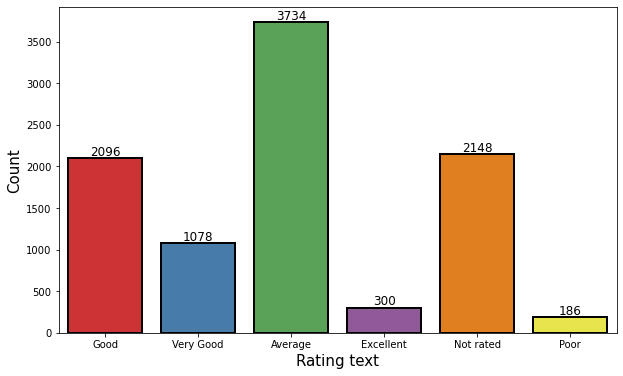

In [44]:
# Visualizing the feature 'Rating text' in countplot

plt.figure(figsize=(10,6))
ab = sns.countplot(zomato['Rating text'],palette='Set1',linewidth=2,edgecolor='black')
plt.xlabel('Rating text',fontsize=15)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

#### Based on rating text, most of the restaurants which is 3737 have been rated as Average and 2148 restaurants are not rated

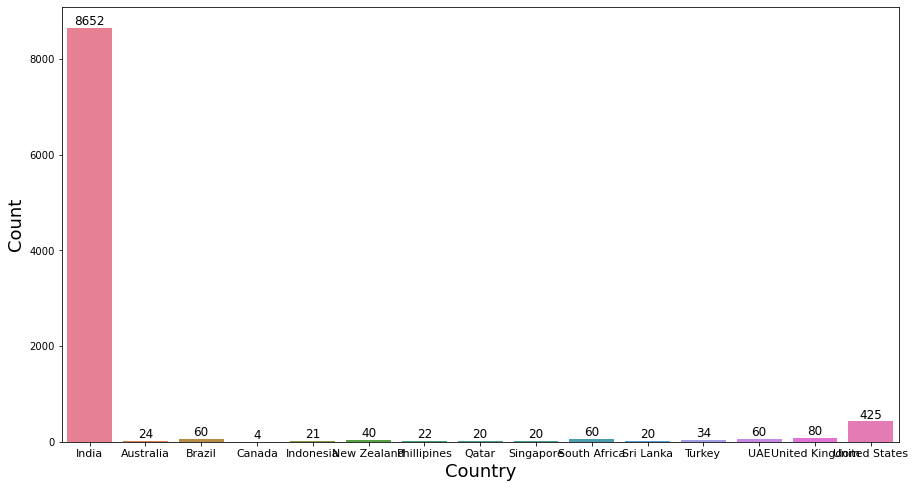

In [45]:
# Visualizing the feature 'Country' in countplot

plt.figure(figsize=(15,8))
ab = sns.countplot(zomato['Country'],palette='husl')
plt.xlabel('Country',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=11)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

#### Maximum restaurants are documented from India, which is almost 94% of the data are restaurants from India

## BIVARIATE ANALYSIS WITH TARGET  VARIABLE -'Average cost for Two'


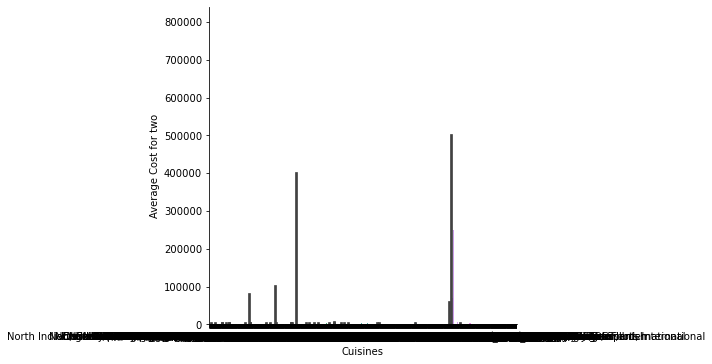

In [47]:
sns.catplot(x='Cuisines',y='Average Cost for two',data=zomato,kind='bar')


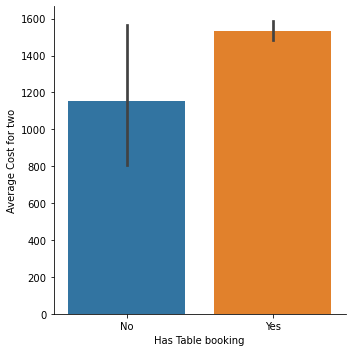

In [48]:
sns.catplot(x='Has Table booking',y='Average Cost for two',data=zomato,kind='bar')


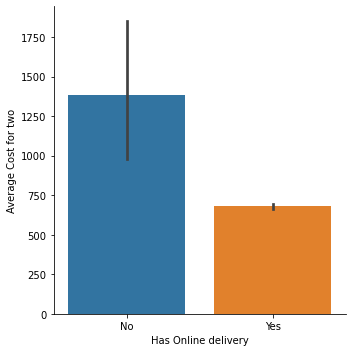

In [49]:
sns.catplot(x='Has Online delivery',y='Average Cost for two',data=zomato,kind='bar')


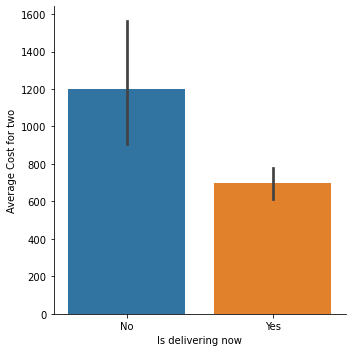

In [50]:
sns.catplot(x='Is delivering now',y='Average Cost for two',data=zomato,kind='bar')

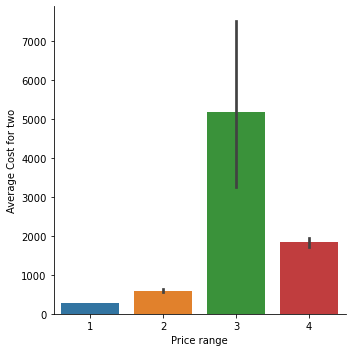

In [51]:
sns.catplot(x='Price range',y='Average Cost for two',data=zomato,kind='bar')

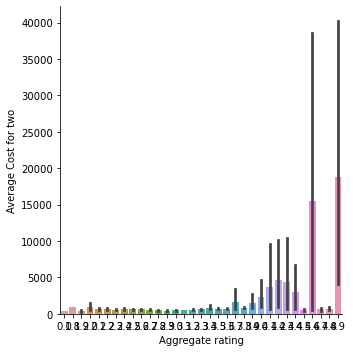

In [52]:
sns.catplot(x='Aggregate rating',y='Average Cost for two',data=zomato,kind='bar')


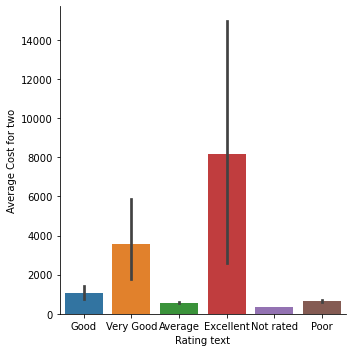

In [54]:
sns.catplot(y='Average Cost for two',x='Rating text',data=zomato,kind='bar')


<AxesSubplot:xlabel='Cuisines', ylabel='Average Cost for two'>

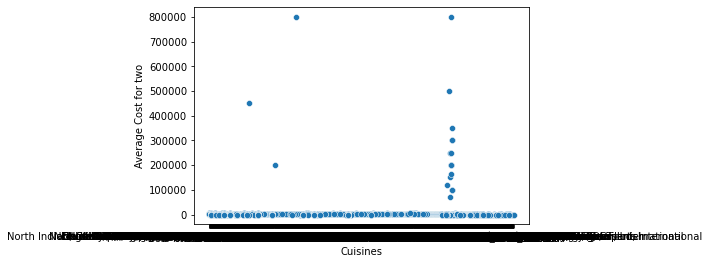

In [55]:
sns.scatterplot(x='Cuisines',y='Average Cost for two',data=zomato)

## TARGET VARIABLE -'PRICE RANGE'

<AxesSubplot:xlabel='Cuisines', ylabel='Price range'>

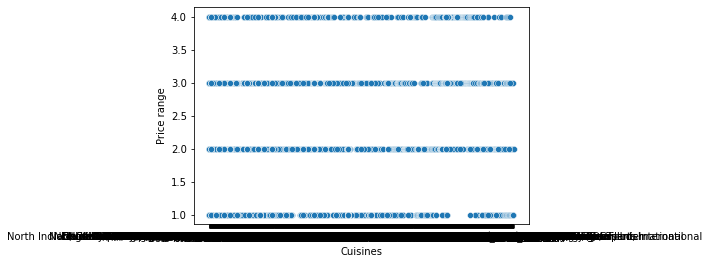

In [57]:
sns.scatterplot(x='Cuisines',y='Price range',data=zomato,palette='hls')


<AxesSubplot:xlabel='Votes', ylabel='Price range'>

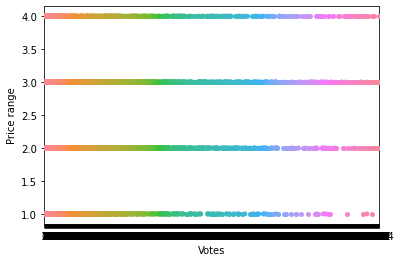

In [58]:
sns.stripplot(x='Votes',y='Price range',data=zomato)


<AxesSubplot:xlabel='Country', ylabel='Price range'>

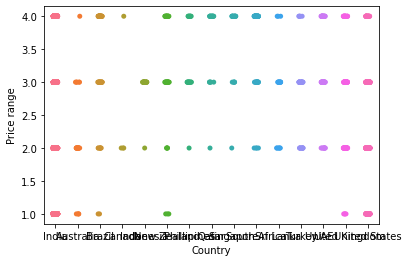

In [59]:
sns.stripplot(x='Country',y='Price range',data=zomato,palette='husl')


<AxesSubplot:xlabel='Has Online delivery', ylabel='Price range'>

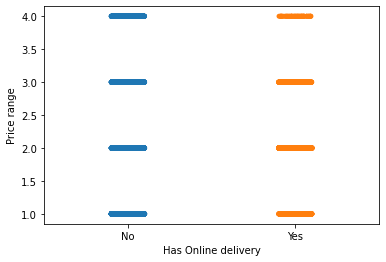

In [60]:
sns.stripplot(x='Has Online delivery',y='Price range',data=zomato)

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

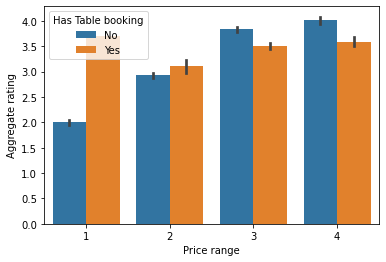

In [61]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=zomato)


<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

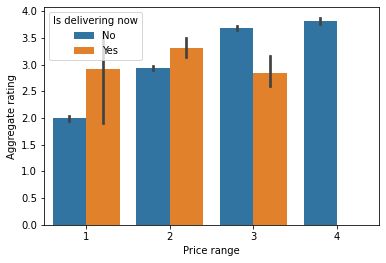

In [62]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Is delivering now', data=zomato)


Text(0.5, 1.0, 'TOP 10 CUISINES')

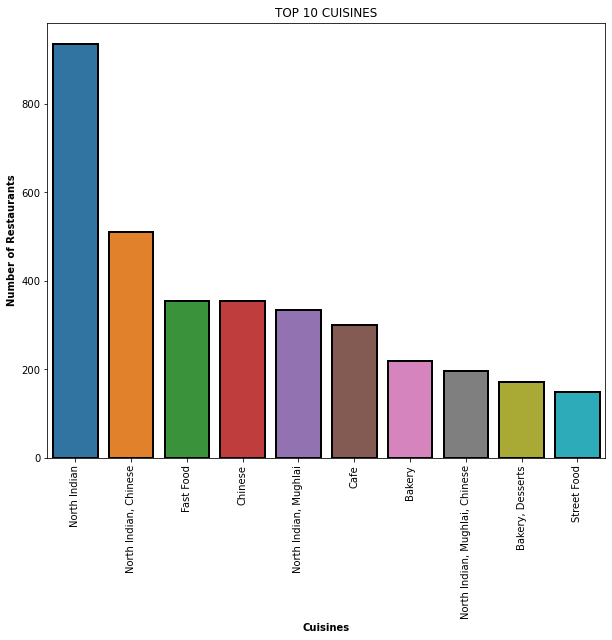

In [63]:
#Checking Top  10 Cuisines 

plt.figure(figsize=(10,8))
sns.barplot(x=zomato["Cuisines"].value_counts()[:10].index,y=zomato["Cuisines"].value_counts()[:10],linewidth=2,edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Cuisines",fontweight="bold")
plt.ylabel("Number of Restaurants",fontweight="bold")
plt.title("TOP 10 CUISINES")

#### Out of all the Top food Cuisine , North Indian food served the best and was the Top most preferred food among all .


In [64]:
#Lets see countrywise distribution

country_zomato = pd.DataFrame(zomato['Country'].value_counts())
country_zomato['%'] = round(country_zomato['Country']*100/len(zomato),2)
country_zomato.head()

,Country,%
India,8652,90.67
United States,425,4.45
United Kingdom,80,0.84
Brazil,60,0.63
South Africa,60,0.63


In [65]:
# Lets combine small values

top_2 = country_zomato[0:2]
others = pd.DataFrame(country_zomato[2:].sum())
others = others.T
others = others.rename(index = {0:'others'})
country = top_2.append(others)
country

,Country,%
India,8652.0,90.67
United States,425.0,4.45
others,465.0,4.88


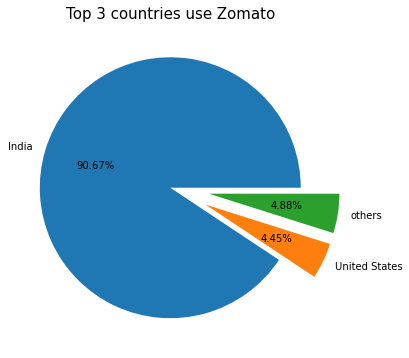

In [66]:
# Plot of top 5 country who has most of the restaurants

plt.figure(figsize = (12,6))
explode = [0,0.3,0.3]
plt.pie(country['%'],labels = country.index,autopct='%1.2f%%',explode = explode)
plt.title("Top 3 countries use Zomato", fontsize = 15)
plt.show()          

#### zomato's Top transactions are made from India after that USA and other countries.

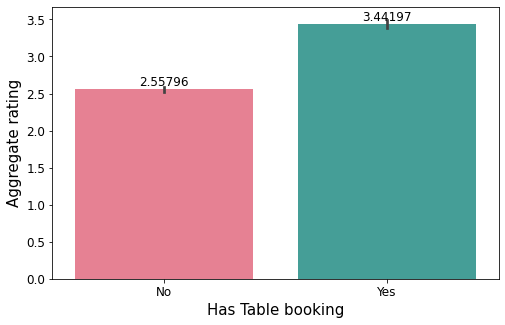

In [37]:
# Visualizing the Has Table booking Vs Aggregate rating by barplot

plt.figure(figsize=(8,5))
cat=sns.barplot(data=zomato, x='Has Table booking',y='Aggregate rating',palette='husl')
plt.xlabel("Has Table booking",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12)
plt.show()

#### Restaurants which have the option of booking table got good aggregated rating compared with restaurants which as no option


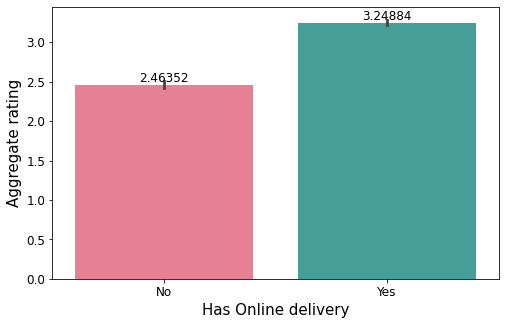

In [38]:
# Visualizing the Has Online delivery Vs Aggregate rating by barplot

plt.figure(figsize=(8,5))
cat=sns.barplot(data=zomato, x='Has Online delivery',y='Aggregate rating',palette='husl')

plt.xlabel("Has Online delivery",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i in cat.containers:
    cat.bar_label(i,fontsize=12)
plt.show()

#### Restaurants which have the option of Online Delivery got good aggregated rating compared with restaurants with No Online Delivery option.

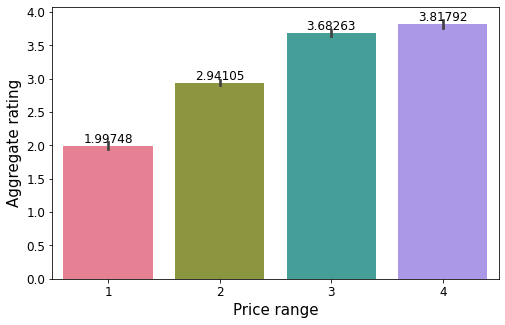

In [39]:
# Visualizing the Price range Vs Aggregate rating by barplot

plt.figure(figsize=(8,5))
cat=sns.barplot(data=zomato, x='Price range',y='Aggregate rating',palette='husl')

plt.xlabel("Price range",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i in cat.containers:
    cat.bar_label(i,fontsize=12)
plt.show()

#### When we compare Price range vs Aggregate rating,the restaurants which has Price range of 4 and 3 have an aggregate rating of 3.8 and 3.6 which is good while restaurants which has Price range of 2 have an aggregate rating of 2.9 which is average and below have an aggregate rating of 1.9 which is poor.

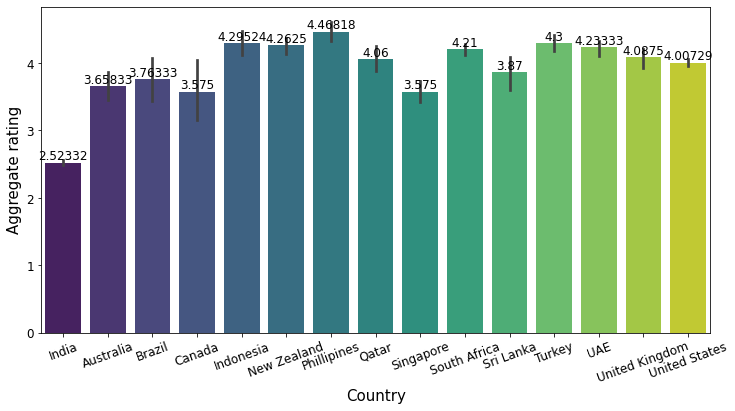

In [42]:
# Visualizing the Country Vs Aggregate rating by barplot

plt.figure(figsize=(12,6))
cat=sns.barplot(data=zomato, x='Country',y='Aggregate rating',palette='viridis')
plt.xlabel("Country",fontsize=15)
plt.ylabel("Aggregate rating",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
for i in cat.containers:
    cat.bar_label(i,fontsize=12)
plt.show()

#### Country with highest aggregated rating is 'Phillipines' with 4.4, 'Turkey' with 4.3, 'Indonesia', 'New Zealand', 'UAE' and 'South  Africa' with 4.2.The Country with the lowest rating is 'India' with 2.5 rating.

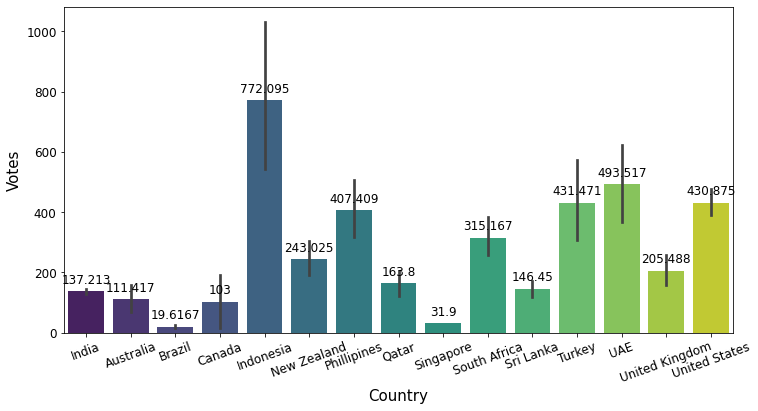

In [43]:
# Visualizing the Country Vs Votes by barplot

plt.figure(figsize=(12,6))
cat=sns.barplot(data=zomato, x='Country',y='Votes',palette='viridis')

plt.xlabel("Country",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)

for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5)
plt.show()

#### Based on Customer's Votes on Restaurants, we can observe that most of the customer's in Indonesia, UAE, Turkey, United States, Phillipines and South Africa have voted about the restaurants,which is one of the reason as the Aggregate ratings are high in these countries.

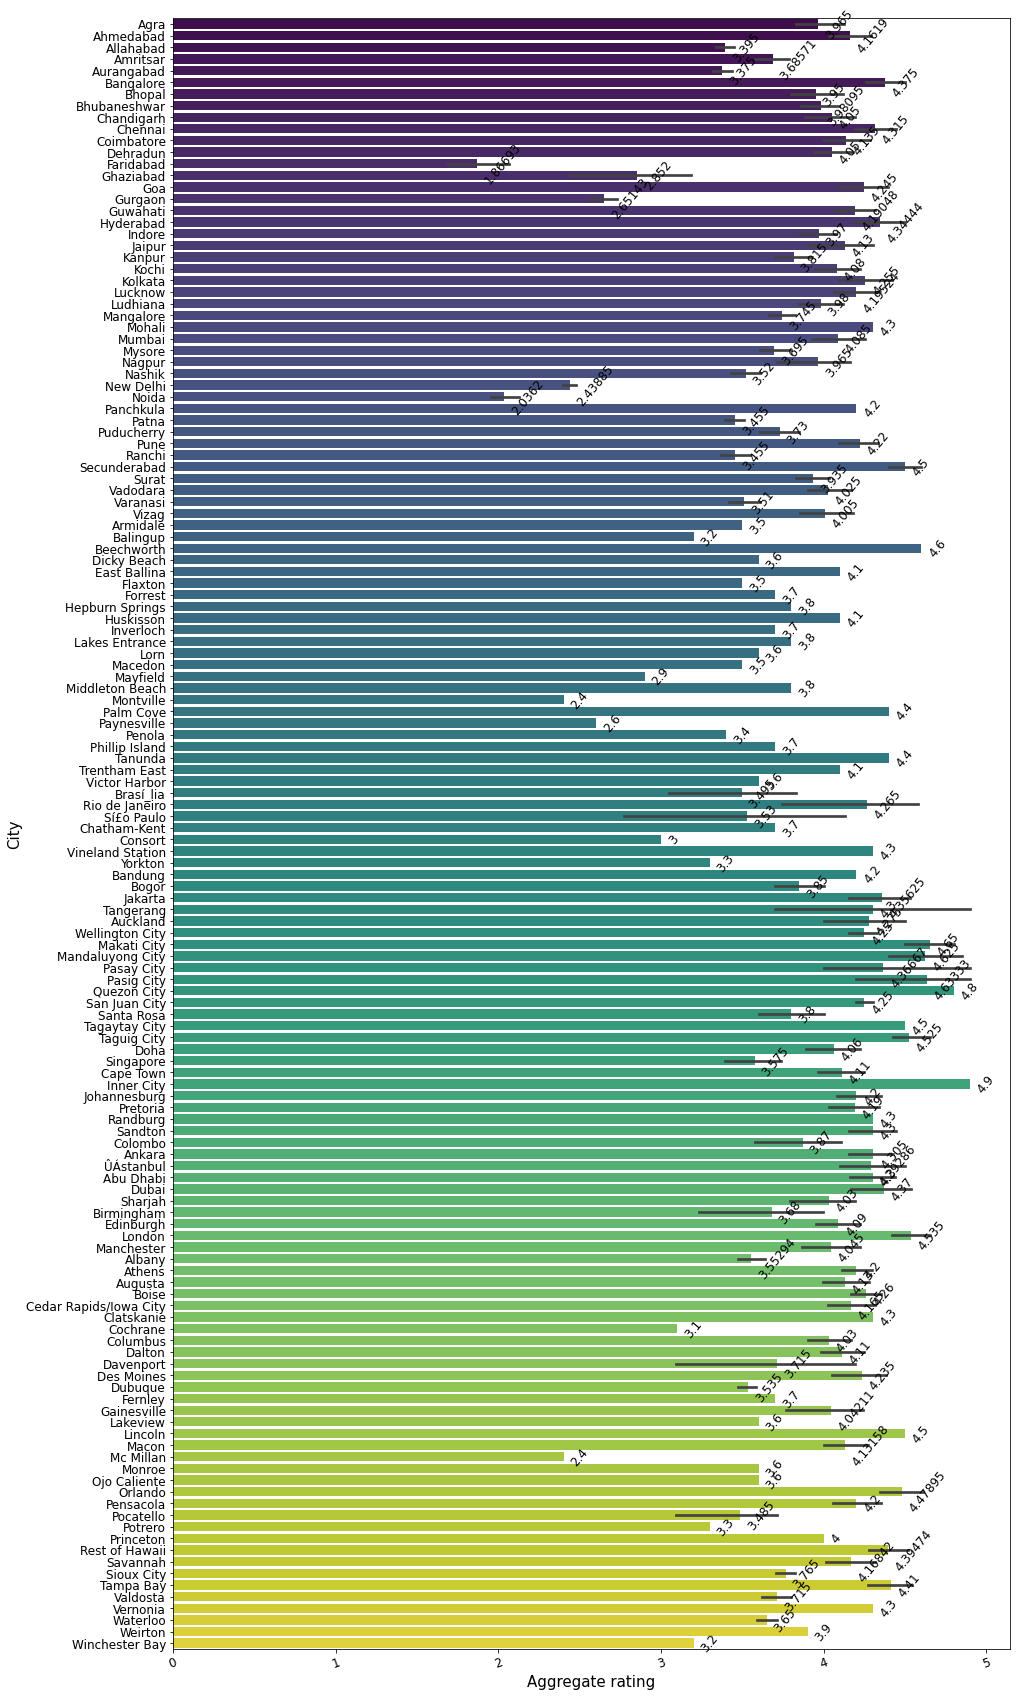

In [44]:
# Visualizing the City Vs Aggregate rating by barplot

plt.figure(figsize=(15,30))
cat=sns.barplot(data=zomato, y='City',x='Aggregate rating',palette='viridis')

plt.xlabel("Aggregate rating",fontsize=15)
plt.ylabel("City",fontsize=15)
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)

for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=5,rotation=50)
plt.show()

#### City with highest Aggregate ratings are Inner City 4.9, Quezon City 4.8, Beechworth 4.6, London, Lincoln and Secunderabad with 4.5 while City with lowest Aggregate ratings are Faridabad 1.8 and Noida 2.0.

## VISUALIZING VARIOUS TRENDS IN GRAPH IN DIFFERENT COUNTRIES 

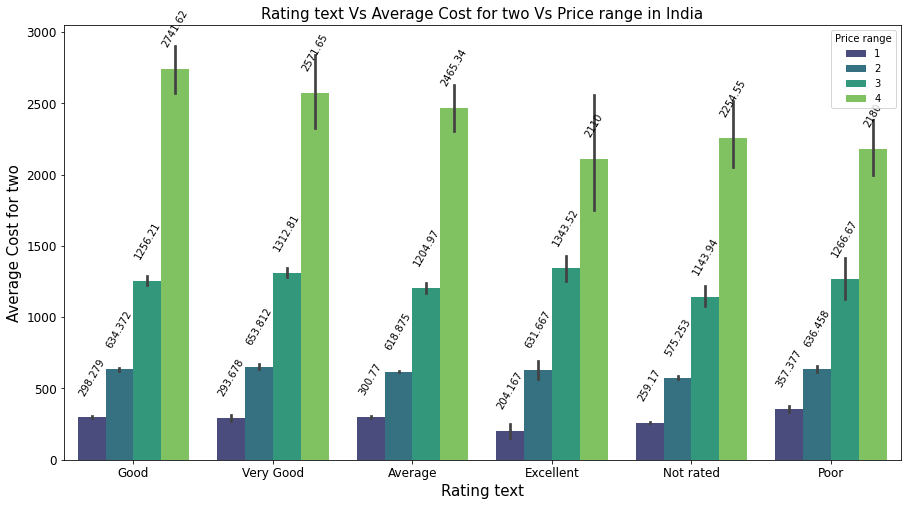

In [45]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in India by barplot


filter = zomato[zomato['Country']=='India']
plt.figure(figsize=(15,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in India',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=20,rotation=60)
plt.show()

####  We can observe that in India, it is possible to get an excellent food at an average cost for two  with Price Range(Indian Rupee) .

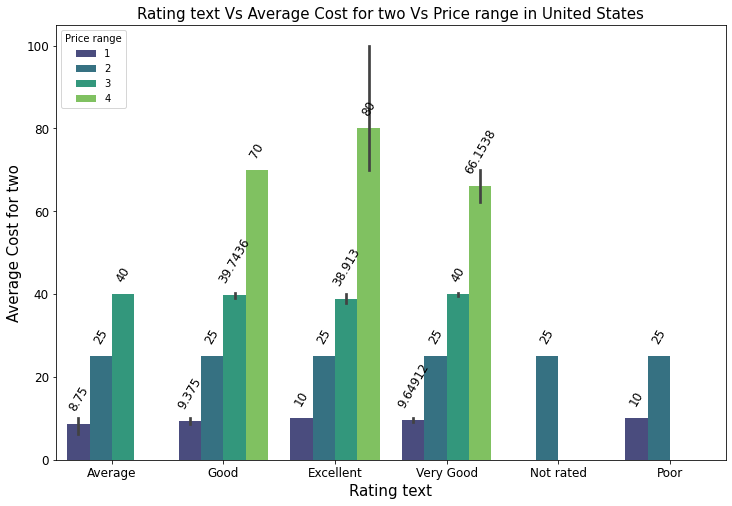

In [46]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in United States by barplot

filter = zomato[zomato['Country']=='United States']
plt.figure(figsize=(12,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')

plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in United States',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=10,rotation=60)
plt.show()

#### In United States, restaurants which serves excellent food at an average cost for two with Price Range(Dollar)


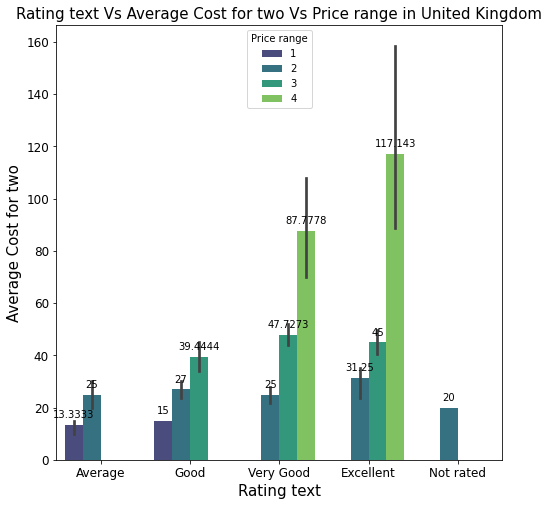

In [49]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in United Kingdom by barplot


filter = zomato[zomato['Country']=='United Kingdom']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')

plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in United Kingdom',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=5)
plt.show()

#### In United Kingdom, restaurants which serves excellent food at an average cost for two is given Price Range 1 - 15 (Rating - Good)in Pounds.



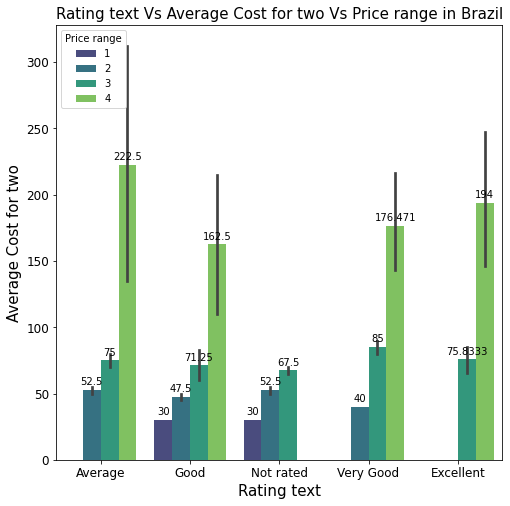

In [50]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Brazil by barplot


filter = zomato[zomato['Country']=='Brazil']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')

plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Brazil',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

#### In Brazil, to get an excellent food at an average cost for two with Price Range of 1-30  with good rating and -194 with excellent rating (Brazilian Real).

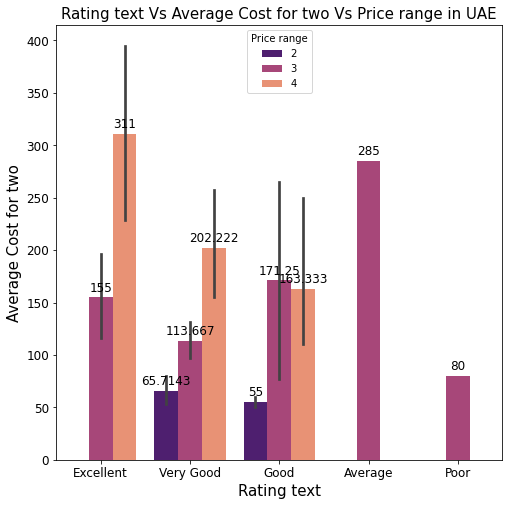

In [51]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in UAE by barplot

filter = zomato[zomato['Country']=='UAE']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in UAE',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=12,padding=3)
plt.show()

#### In UAE, Price Range is classified into 2,3 and 4,to get an excellent food at an average cost(Emirati Diram) for two where price range of 2-65.71 is very good rating while 4-311 is excellent rating.

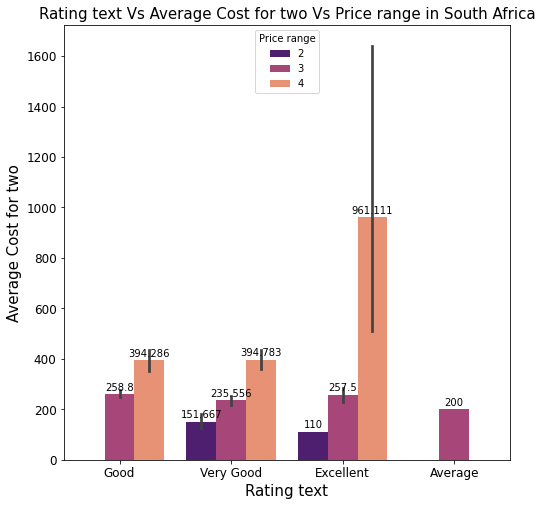

In [52]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in South Africa by barplot


filter = zomato[zomato['Country']=='South Africa']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='magma')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in South Africa',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=2)
plt.show()

#### In South Africa, Price Range is classified into 2,3 and 4, to get an excellent food at an average cost(Rand) for two with price Range 2 - 110 is rated as Excellent.

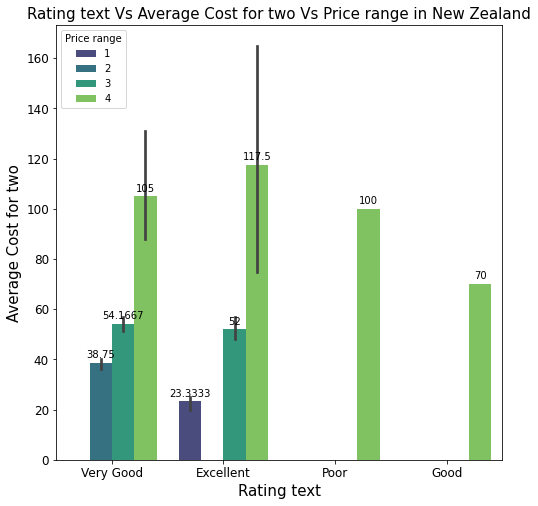

In [54]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in New Zealand by barplot

filter = zomato[zomato['Country']=='New Zealand']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in New Zealand',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

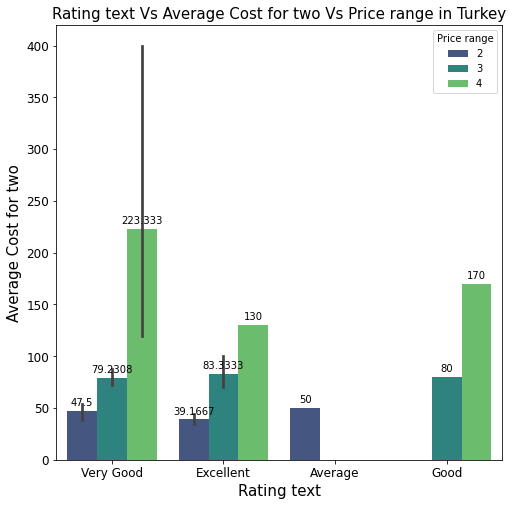

In [55]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Turkey by barplot

filter = zomato[zomato['Country']=='Turkey']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='viridis')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Turkey',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

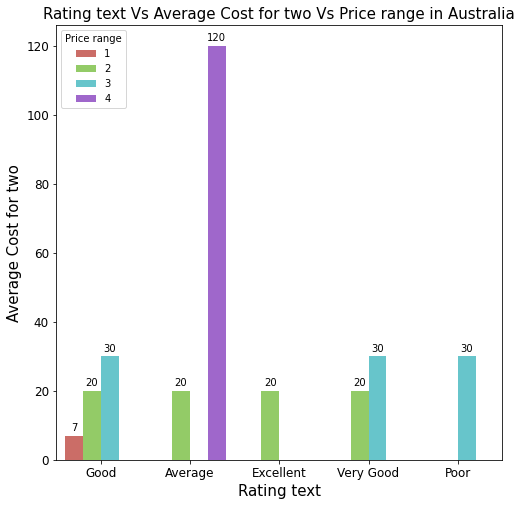

In [56]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Australia by barplot


filter = zomato[zomato['Country']=='Australia']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Australia',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

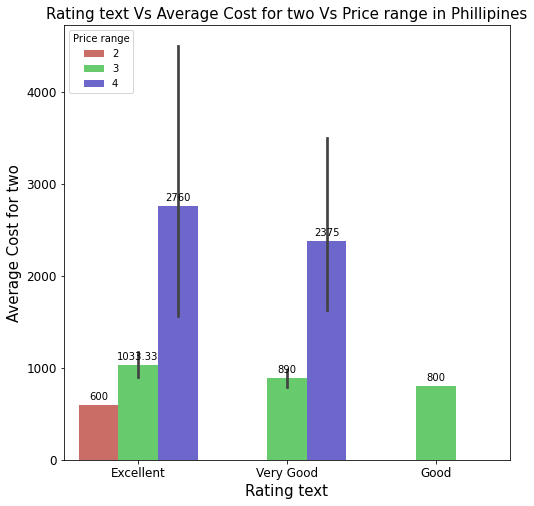

In [57]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Phillipines by barplot

filter = zomato[zomato['Country']=='Phillipines']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Phillipines',fontsize=15)

for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

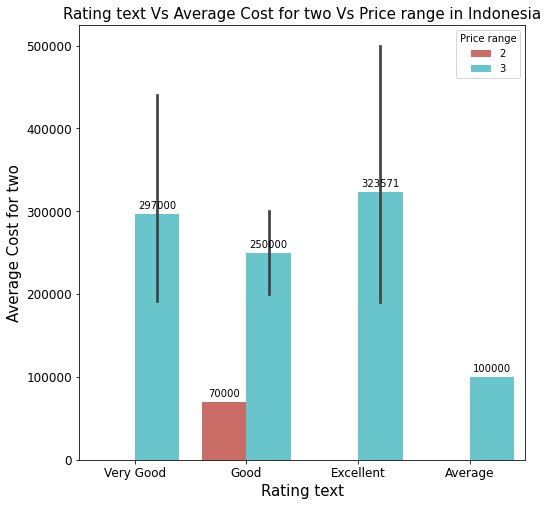

In [58]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Indonesia by barplot


filter = zomato[zomato['Country']=='Indonesia']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Indonesia',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

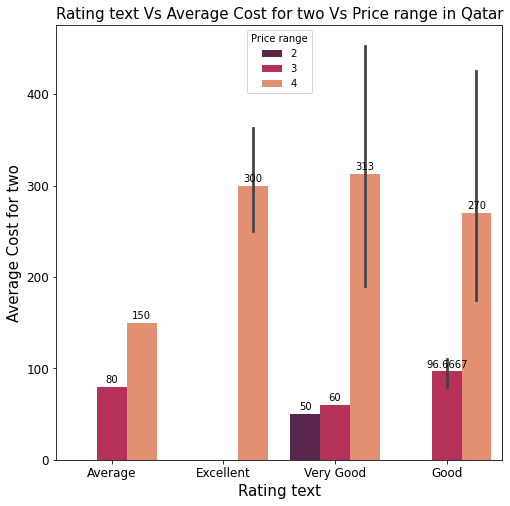

In [60]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Qatar by barplot


filter = zomato[zomato['Country']=='Qatar']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='rocket')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Qatar',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=2)
plt.show()

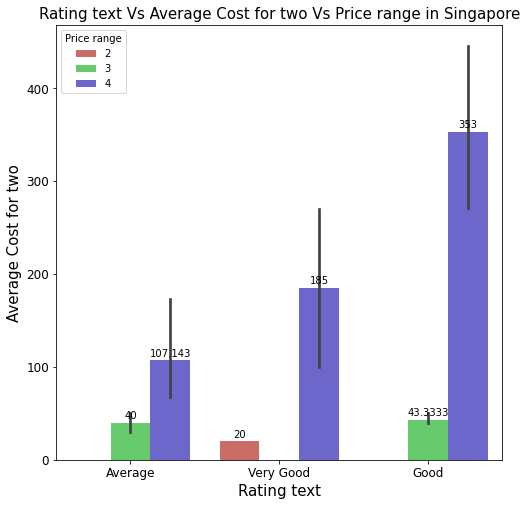

In [59]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Singapore by barplot


filter = zomato[zomato['Country']=='Singapore']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='hls')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Singapore',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=2)
plt.show()

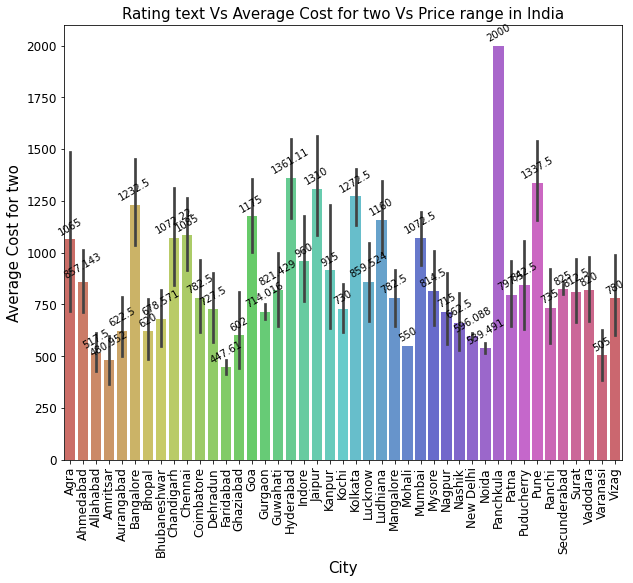

In [63]:
# Visualizing Average Cost for two Vs City in India by barplot

filter = zomato[zomato['Country']=='India']
plt.figure(figsize=(10,8))
cat=sns.barplot(data=filter, x='City',y='Average Cost for two',palette='hls')
plt.xlabel("City",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in India',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=2,rotation=30)
plt.show()

#### As noticed,94% data are from India, hence Comparing City vs Average Cost for Two in India.Based on above barplot, we can observe Panchkula got the highest Average cost with 2000, followed by Hyderabad 1361 and Pune with 1337.City with lowest average cost is Faridabad with 447 and Amritsar with 480.

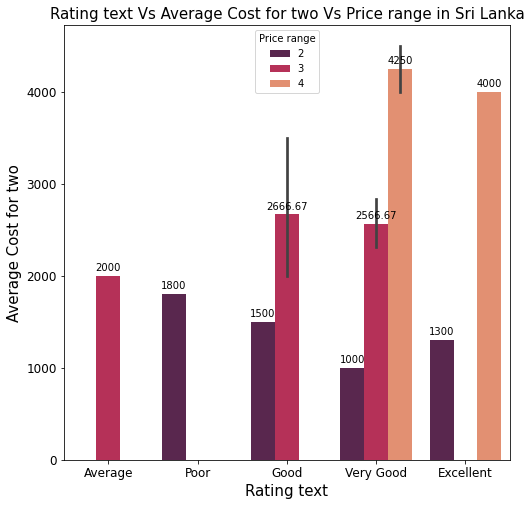

In [64]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Sri Lanka by barplot


filter = zomato[zomato['Country']=='Sri Lanka']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='rocket')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Sri Lanka',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

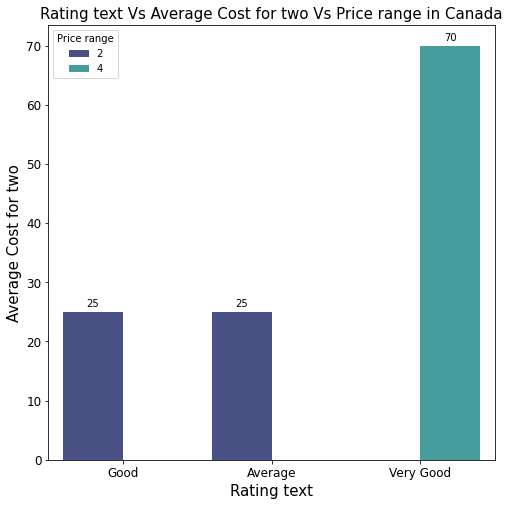

In [62]:
# Visualizing Rating text Vs Average Cost for two Vs Price range in Canada by barplot


filter = zomato[zomato['Country']=='Canada']
plt.figure(figsize=(8,8))
cat=sns.barplot(data=filter, x='Rating text',y='Average Cost for two',hue='Price range',palette='mako')
plt.xlabel("Rating text",fontsize=15)
plt.ylabel("Average Cost for two",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rating text Vs Average Cost for two Vs Price range in Canada',fontsize=15)
for i in cat.containers:
    cat.bar_label(i,fontsize=10,padding=3)
plt.show()

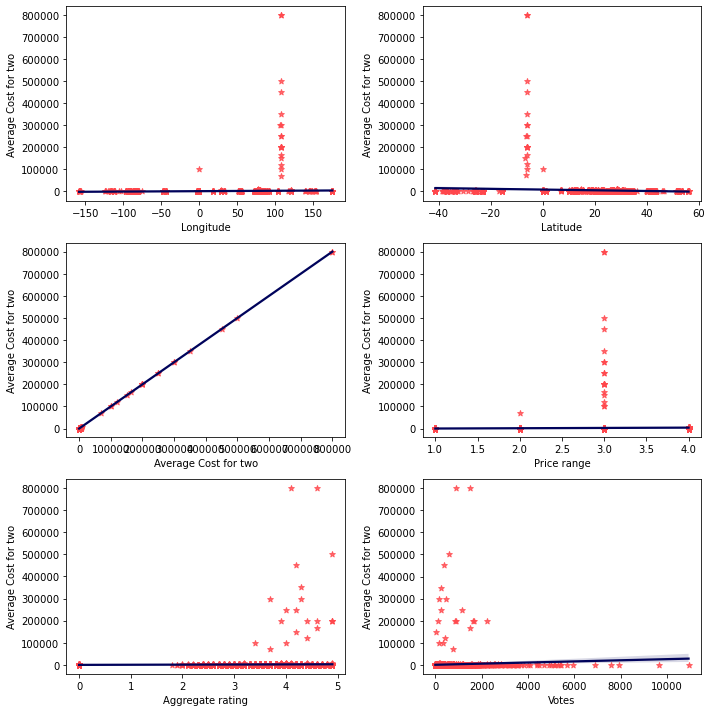

In [66]:
# Visualizing the dataset with regplot with target variable ''Average Cost for two'

plt.figure(figsize=(10,10))
plot_number=1
for i in zomato_num:
    if plot_number <=6:
        ax=plt.subplot(3,2,plot_number)
        sns.regplot(x=zomato[i],y=zomato['Average Cost for two'],scatter_kws={"color": "#ff474c"}, 
                    line_kws={"color": "#00035b"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

#### Above regplot shows that there is no significant linear relationship between features and target variable 'Average Cost for two' with any other features.

## DATA DISTRIBUTION

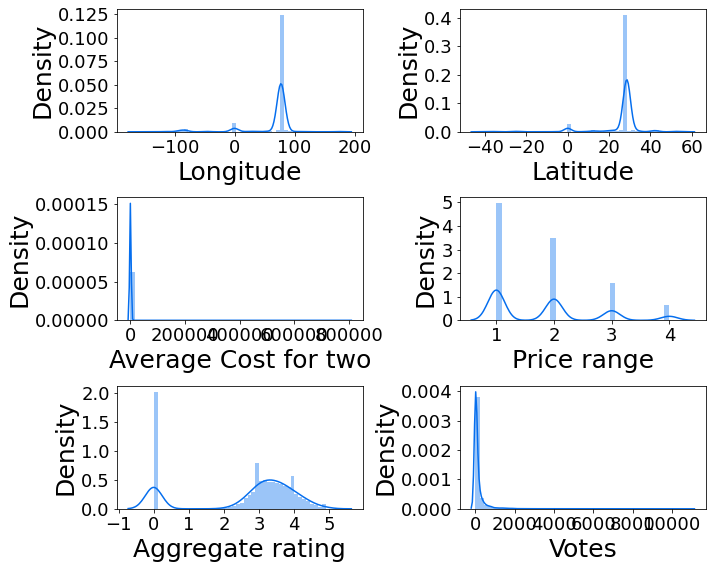

In [30]:
# Checking the distribution of the numerical features using distplot

plt.figure(figsize=(10,8))
plot_num=1

for i in zomato_num:
    if plot_num<=6:
        sub=plt.subplot(3,2,plot_num)
        sns.distplot(zomato[i],color='#056eee')
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Density',fontsize=25)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plot_num+=1
plt.tight_layout()

#### Above distribution plot shows the features 'Country Code',' Average Cost for two', 'Price range' and 'Votes' are skewed towards right.Features'Longitude', 'Latitude' and' Aggregate rating' are skewed towards left.

## DETECTING OUTLIERS WITH VISUALIZATION-

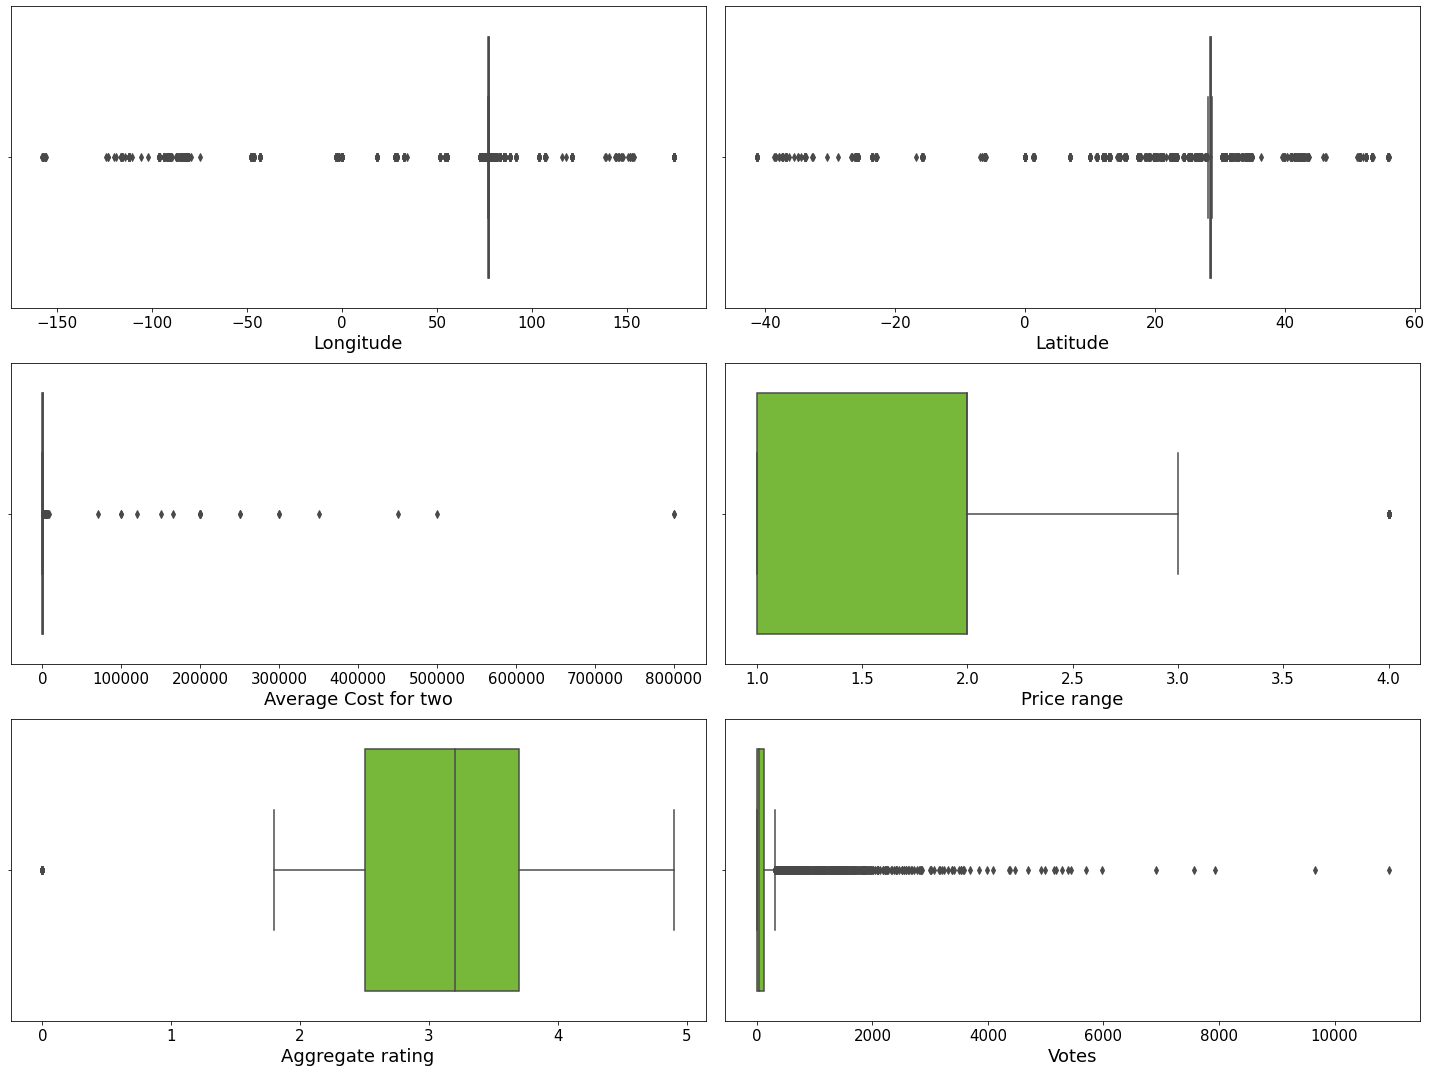

In [31]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(20,15))
st = 1
for i in zomato_num:
    if st <=6:
        sub = plt.subplot(3,2,st)
        sns.boxplot(zomato[i],color='#76cd26')
        plt.xlabel(i,fontsize=18)
        plt.xticks(fontsize=15)
    st+=1
plt.tight_layout()

#### Based on boxplot, we can observe outliers are present in the features Country Code, Longitude, Latitude, Average cost for two,Votes, Price range and Aggregate rating.

# DATA FEATURE SELECTION-

## Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in zomato.columns:
    if (zomato[i].dtypes == 'object'):
        zomato[i] = le.fit_transform(zomato[i].values.reshape(-1,1))
zomato.head(5)

,Country,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes
0,3,3196,1,17,78.011544,27.161661,1514,850,4,0,0,0,3,3.9,2,140
1,3,5253,1,17,0.000000,0.000000,1514,700,4,0,0,0,2,3.5,2,71
2,3,6911,1,17,78.011608,27.160832,1306,500,4,0,0,0,2,3.6,2,94
3,3,1637,1,205,77.998092,27.195928,1645,400,4,0,0,0,2,4.0,5,87
4,3,4914,1,205,78.007553,27.201725,1373,1000,4,0,0,0,3,4.2,5,177


#### Encoded the categorical fetures to Numerical by Label Encoder

## CORRELATION MATRIX

<AxesSubplot:>

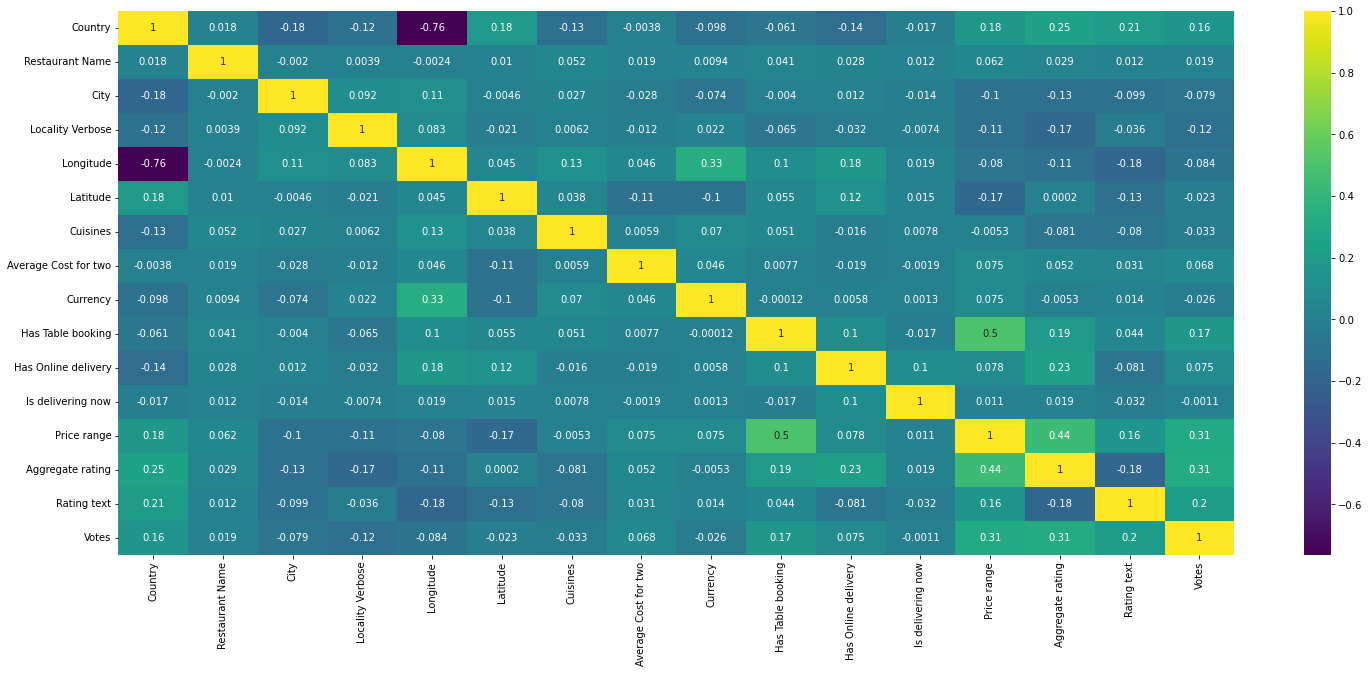

In [33]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(25,10))
sns.heatmap(zomato.corr(),annot=True,cmap='viridis')

#### KEY OBSERVATIONS -

- The heatmap shows the correlation matrix by visualizing the data. As we can observe the relation is between feature to target variables .This heat map contains both positive and negative correlations.
- From the above observation,we observe that 'Longitude' columns are negatively correlated with target variable. 
- 'Aggregate rating','Votes' and 'Price Range' columns are positively correlated with each other.

### Checking correlation of Average cost for two

<function matplotlib.pyplot.show(close=None, block=None)>

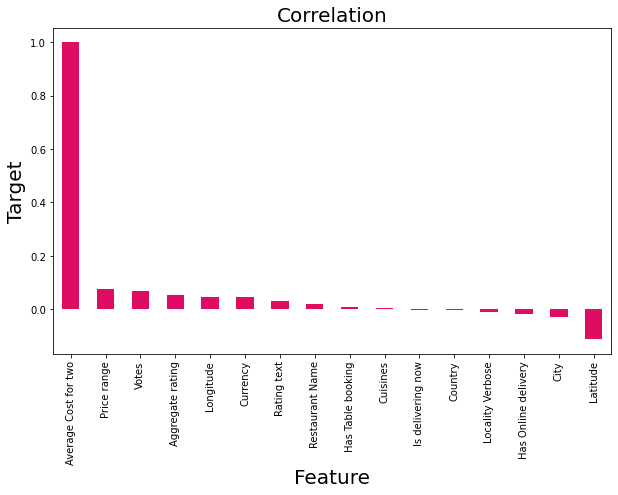

In [34]:
# Visualizing the correlation of the features with target variable 'Average Cost for two'

plt.figure(figsize=(10,6))
zomato.corr()['Average Cost for two'].sort_values(ascending=False).plot(kind='bar',color='#de0c62')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [35]:
zomato.corr()['Average Cost for two'].sort_values()

Latitude               -0.111080
City                   -0.028306
Has Online delivery    -0.019017
Locality Verbose       -0.011882
Country                -0.003793
Is delivering now      -0.001866
Cuisines                0.005875
Has Table booking       0.007733
Restaurant Name         0.019235
Rating text             0.031440
Currency                0.045566
Longitude               0.045948
Aggregate rating        0.051864
Votes                   0.067833
Price range             0.075111
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

#### KEY  OBSERVATIONS-

- The column 'Cuisines, Has Table booking, Restaurant Name, Rating text, Currency, Longitude, Aggregate rating, Votes and Price range are positively correlated with target variable
- The column 'Latitude', City, Has Online delivery, Locality Verbose, Country and Is delivering now are negatively correlated with target variable'Average Cost for Two'.
- The columns 'longitude and Country are highly negatively correlated to the target variable 'Average Cost for Two'.

## REMOVING OUTLIERS WITH Zscore

In [36]:
from scipy.stats import zscore

col =['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

z1=zomato[col]
z1.head(5)

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,78.011544,27.161661,850,3,3.9,140
1,0.000000,0.000000,700,2,3.5,71
2,78.011608,27.160832,500,2,3.6,94
3,77.998092,27.195928,400,2,4.0,87
4,78.007553,27.201725,1000,3,4.2,177


In [37]:
z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([  20,  102,  103,  104,  107,  111,  112,  115,  119,  169,  181,
        183,  187,  189,  190,  191,  193,  197,  200,  520,  523,  539,
        611,  623,  624,  627,  628,  629,  631,  632,  634,  840,  930,
        931, 1215, 1237, 1242, 1676, 1678, 1680, 1683, 1687, 1690, 1714,
       1720, 1778, 1780, 1782, 1785, 1786, 1787, 1788, 1789, 1790, 1792,
       1856, 1859, 1860, 1861, 1864, 1866, 1868, 1871, 1875, 2011, 2256,
       2381, 2384, 2389, 2392, 2394, 2401, 2402, 2404, 2409, 2417, 2425,
       2431, 2432, 2433, 2436, 2444, 2451, 2456, 2459, 2461, 2469, 2470,
       2471, 2477, 2483, 2486, 2488, 2491, 2492, 2493, 2494, 2495, 2692,
       2695, 2712, 2713, 2714, 2814, 2964, 2965, 2975, 2977, 2981, 3352,
       3359, 3360, 3362, 3368, 3369, 3370, 3374, 3463, 3538, 3554, 3696,
       3762, 4014, 4015, 4025, 4049, 4383, 4402, 5520, 5693, 5910, 6035,
       6077, 6085, 6088, 6224, 6297, 6373, 6409, 6421, 6463, 7239, 7770,
       7810, 8533, 8537, 8541, 8543, 8545, 8547, 8

In [38]:
zomato_new = zomato[(z<3).all(axis=1)]

In [39]:
zomato.shape

(9542, 16)

In [40]:
zomato_new.shape

(8756, 16)

In [41]:
# Data Loss

data_loss =  (9542-8756)/9542*100
data_loss

8.237266820373087

#### After applying Zscore method, data loss is 8.23% which is in acceptable range.

## CHECKING SKEWNESS 

In [42]:
# Checking skewness

zomato_new.skew().sort_values(ascending=False)[np.abs(zomato_new.skew())>0.5]

Is delivering now       15.956834
Currency                 6.610471
Country                  6.224507
Average Cost for two     3.667387
Votes                    3.555810
Has Table booking        2.268965
Has Online delivery      1.016921
Price range              0.987956
Aggregate rating        -0.887535
City                    -1.505859
Latitude                -2.246169
Longitude               -3.179687
dtype: float64

#### -These are the columns where skewness is present.

In [43]:
# Applying sqrt transformation method to the feature Average Cost for two

zomato_new['Average Cost for two']= np.sqrt(zomato_new['Average Cost for two'])

In [44]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['Longitude','Price range','Aggregate rating','Votes','Latitude']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
zomato_new[skew] = pt.fit_transform(zomato_new[skew].values)

In [45]:
# Checking skewness

zomato_new.skew()

Country                  6.224507
Restaurant Name          0.042649
City                    -1.505859
Locality Verbose        -0.230693
Longitude               -0.963748
Latitude                 0.409584
Cuisines                -0.343326
Average Cost for two     1.546098
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.222590
Aggregate rating        -0.620066
Rating text              0.438078
Votes                   -0.012360
dtype: float64

In [46]:
# Dropping the feature Is delivering now

zomato_new.drop(['Is delivering now'],axis=1,inplace=True)

In [47]:
# Checking skewness

zomato_new.skew().sort_values(ascending=False)[np.abs(zomato_new.skew())>0.5]

Currency                6.610471
Country                 6.224507
Has Table booking       2.268965
Average Cost for two    1.546098
Has Online delivery     1.016921
Aggregate rating       -0.620066
Longitude              -0.963748
City                   -1.505859
dtype: float64

#### KEY OBSERVATION -

- Skewness was high in Columns 'country','Longitude','Price range','Aggregate rating','Votes','Latitude'
- Applied PowerTransformer(method='yeo-johnson') to the columns and skewness reduced reasonably well.
- For 'Average Cost for two' as it is the target variable, tried not to apply transformation methods but the performance of the
Model is very poor, hence applied 'sqrt' to reduce skewness and performance improved
- Kept the threshold to +/- 0.5 to numerical features, except for target variable
- Dropped the feature 'Is delivering now' as the skewness is high.



## Variance Inflation Factor

In [48]:
# Checking Variance inflation factor for the dataset 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = zomato_new.drop('Average Cost for two',axis=1)
x.head(5)

,Country,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
0,3,3196,1,17,8540.395496,183.395240,1514,4,0,0,0.606284,8.151739,2,5.201439
1,3,5253,1,17,0.000000,0.000000,1514,4,0,0,0.556571,6.975607,2,4.464518
2,3,6911,1,17,8540.411004,183.385898,1306,4,0,0,0.556571,7.263085,2,4.767270
3,3,1637,1,205,8537.112079,183.781731,1645,4,0,0,0.556571,8.456605,5,4.683510
4,3,4914,1,205,8539.421179,183.847151,1373,4,0,0,0.606284,9.079150,5,5.459257


In [49]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0    12.210264              Country
1     3.916633      Restaurant Name
2    14.322420                 City
3     5.494874     Locality Verbose
4    16.732158            Longitude
5    16.426295             Latitude
6     5.054177             Cuisines
7    48.035323             Currency
8     1.486115    Has Table booking
9     1.657009  Has Online delivery
10   60.796177          Price range
11   15.953387     Aggregate rating
12    2.484694          Rating text
13   16.696214                Votes


In [52]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Price range','Aggregate rating','Votes','Longitude','Latitude','City']

st= StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Country,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes
1040,3,816,-1.410882,757,0.207773,0.193006,1597,4,0,0,-0.977182,-1.608562,3,-1.583091
1965,3,3209,0.431294,16,0.217160,0.226537,1444,4,0,1,0.653168,-0.439212,4,0.645049
7488,3,3562,0.481083,385,0.257509,0.185590,828,4,0,0,-0.977182,0.020608,0,-0.436603
2169,3,5969,0.431294,123,0.224326,0.202559,1699,4,0,0,-0.977182,0.270792,0,-0.229203
3592,3,4070,0.431294,487,0.213550,0.213807,837,4,0,1,0.653168,0.716731,2,1.079185


In [53]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0    11.993688              Country
1     3.829212      Restaurant Name
2     1.067281                 City
3     5.313225     Locality Verbose
4     1.324380            Longitude
5     1.370343             Latitude
6     4.875512             Cuisines
7    21.665653             Currency
8     1.529522    Has Table booking
9     1.593648  Has Online delivery
10    1.758918          Price range
11    4.469214     Aggregate rating
12    2.489680          Rating text
13    4.882037                Votes


In [748]:
# Dropping the feature Currency

x.drop(['Currency'],axis=1,inplace=True)

In [749]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor             Features
0     3.751689      Restaurant Name
1     9.653630                 City
2     4.932354     Locality Verbose
3     1.397011            Longitude
4     1.446768             Latitude
5     4.566543             Cuisines
6     1.547809    Has Table booking
7     1.599262  Has Online delivery
8     1.776296          Price range
9     4.438902     Aggregate rating
10    2.425255          Rating text
11    4.876809                Votes
12    8.178787              Country


#### VIF is high in the features 'Price range','Aggregate rating','Votes','Longitude','Latitude,'City'.Applied Standard Scaler method to standardize the feature and Dropped the feature Currency to reduce VIF across all the features.

# MODEL BUILDING

## REGRESSION MODEL- PREDICTING : 'Average Cost For Two'.

In [54]:
# Checking the dimension of the dataset

x.shape

(8756, 14)

In [55]:
# Splitting the target variable for train, test

y = zomato_new['Average Cost for two']
y.shape

(8756,)

In [56]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

## Finding Random State

In [57]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  90.97717214119385 on Random state 169


## Train and Test Split

In [58]:
# Training the Model with .30 as test size and random state at 169

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=169)

In [59]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

## Lasso

In [60]:
ls = Lasso()

ls.fit(x_train,y_train)
ls.score(x_train,y_train)
print(ls.score(x_train,y_train)*100)
ls_predict=ls.predict(x_test)
cr1 = cross_val_score(ls,x,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ls_predict)))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

64.29592068163682
MSE: 30.128973173177965
MAE: 3.743202548961082
RMSE: 5.488986534250013
r2_score: 26.41445564381578
CV score of Lasso Regression: 52.22166074478073


## Ridge

In [61]:
rd = Ridge()

rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print(rd.score(x_train,y_train)*100)
rd_predict=rd.predict(x_test)
cr2 = cross_val_score(rd,x,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rd_predict)))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

72.9953521531898
MSE: 21.38066935149519
MAE: 3.261728351334903
RMSE: 4.623923588414409
r2_score: 67.3479991311213
CV score of Ridge Regression: 50.2443389453733


## LinearRegression

In [62]:
LR=LinearRegression(copy_X='bool',fit_intercept='bool',n_jobs=2,positive='bool')

LR.fit(x_train,y_train)
LR.score(x_train,y_train)
print(LR.score(x_train,y_train)*100)
LR_predict=LR.predict(x_test)
cr3 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, LR_predict)))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

63.64145123043161
MSE: 28.636320938437883
MAE: 3.539633396842151
RMSE: 5.351291520599292
r2_score: 49.9426917593775
CV score of Linear Regression: 51.30683865820663


## RandomForestRegressor

In [63]:
RFR = RandomForestRegressor()

RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
print(RFR.score(x_train,y_train)*100)
RFR_predict=RFR.predict(x_test)
cr4 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, RFR_predict)))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

98.47454370982824
MSE: 7.925548451154494
MAE: 2.096271090290946
RMSE: 2.8152350614388304
r2_score: 90.04412894894985
CV score of Random Forest Regressor: 51.30683865820663


## ExtraTreesRegressor

In [64]:
ET = ExtraTreesRegressor()
ET.fit(x_train,y_train)
print(ET.score(x_train,y_train)*100)
ET_predict = ET.predict(x_test)
cr5 = cross_val_score(ET,x,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr5.mean()*100)

100.0
MSE: 8.939211731173991
MAE: 2.172637487996905
RMSE: 2.989851456372706
r2_score: 88.82473863790615
CV score of Extra Trees Regressor: 67.81465056285045


## DecisionTreeRegressor

In [65]:
DT = DecisionTreeRegressor()

DT.fit(x_train,y_train)
DT.score(x_train,y_train)
print(DT.score(x_train,y_train)*100)
DT_predict=DT.predict(x_test)
cr6 = cross_val_score(DT,x,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, DT_predict)))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of DecisionTree Regressor:',cr6.mean()*100)

100.0
MSE: 13.84853753173565
MAE: 2.6596135089548834
RMSE: 3.7213623220180603
r2_score: 84.14217499224559
CV score of DecisionTree Regressor: 54.56981655884172


## KNeighborsRegressor

In [66]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
print(KNN.score(x_train,y_train)*100)
KNN_predict = KNN.predict(x_test)
cr7 = cross_val_score(KNN,x,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, KNN_predict)))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

33.84630190511659
MSE: 89.10789732892319
MAE: 6.567824091677178
RMSE: 9.439697946911394
r2_score: -246.96168849012432
CV score of K Neighbors Regressor: -9.773600257453186


## GradientBoostingRegressor

In [67]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
print(GB.score(x_train,y_train)*100)
GB_predict = GB.predict(x_test)
cr8 = cross_val_score(GB,x,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, GB_predict)))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr8.mean()*100)

90.38277130760635
MSE: 9.27730969559831
MAE: 2.306395042277555
RMSE: 3.045867642495043
r2_score: 87.64797876015871
CV score of Gradient Boosting Regressor: 66.8934324738708


## BaggingRegressor

In [68]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
print(BR.score(x_train,y_train)*100)
BR_predict = BR.predict(x_test)
cr9 = cross_val_score(BR,x,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, BR_predict)))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr9.mean()*100)

97.92854444320473
MSE: 8.602571813369213
MAE: 2.185524922882811
RMSE: 2.9330141174854942
r2_score: 89.25828551196442
CV score of Bagging Regressor: 65.93362073417775


## AdaBoostRegressor

In [69]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train)*100)
ABR_predict = ABR.predict(x_test)
cr10 = cross_val_score(ABR,x,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ABR_predict)))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

83.98146630927712
MSE: 14.416359004680304
MAE: 2.939454926772286
RMSE: 3.7968880684950808
r2_score: 81.56852516104729
CV score of Ada Boost Regressor: 57.56736699902003


## SVR

In [70]:
SV = SVR()

SV.fit(x_train,y_train)
print(SV.score(x_train,y_train)*100)
SV_predict = SV.predict(x_test)
cr11 = cross_val_score(SV,x,y,cv=5)

print('MSE:',mean_squared_error(SV_predict,y_test))
print('MAE:',mean_absolute_error(SV_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, SV_predict)))
print('r2_score:',r2_score(SV_predict,y_test)*100)
print('CV score of SVR:',cr11.mean()*100)

-1.7718720959050138
MSE: 89.60858240290891
MAE: 6.620441498191312
RMSE: 9.466180982999898
r2_score: -15845.624502896586
CV score of SVR: -4.76946319513238


## Hyper Parameter Tuning

### Hyper Parameter Tuning for ExtraTreesRegressor

In [71]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse'],
             'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2],'max_depth':[50,100,120,150]}
            
             
        
gs = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8896338872882541
Best Params {'criterion': 'squared_error', 'max_depth': 120, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}


In [73]:
# Tuning ExtraTreesRegressor with parameters

Final_Model1 = ExtraTreesRegressor(n_estimators =150, criterion ='squared_error',min_samples_split=6,max_depth=120,
                                  min_samples_leaf=1)
                                       
Final_Model1.fit(x_train,y_train)
pred1 = Final_Model1.predict(x_test)
scores = r2_score(y_test,pred1)
cr_v1 = cross_val_score(Final_Model1,x,y,cv=5)

print('MSE:',mean_squared_error(pred1,y_test))
print('MAE:',mean_absolute_error(pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test)))
print('r2_score:',r2_score(pred1,y_test)*100)
print('CV score of Extra Trees Regressor:',cr_v1.mean()*100)

MSE: 8.745743615488939
MAE: 2.159067039952616
RMSE: 2.957320343738388
r2_score: 88.87068700355329
CV score of Extra Trees Regressor: 67.63466104638374


### Hyper Parameter Tuning for BaggingRegressor

In [74]:
# Hyper Parameter Tuning for BaggingRegressor

grid_params={"n_estimators": [100,150,200],'max_features': [0.5, 0.7, 1.0,1.5],
              'max_samples': [0.5, 0.7, 1.0,1.5],'bootstrap':['bool','True']}
            
            
gs = GridSearchCV(BaggingRegressor(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'bootstrap': ['bool', 'True'],
                         'max_features': [0.5, 0.7, 1.0, 1.5],
                         'max_samples': [0.5, 0.7, 1.0, 1.5],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8887175024662428
Best Params {'bootstrap': 'True', 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 100}


In [75]:
# Tuning BaggingRegressor with parameters

Final_Model2 = BaggingRegressor(n_estimators =100, bootstrap = True,max_features=1.0,max_samples=0.7)                                                                    

Final_Model2.fit(x_train,y_train)
pred2 = Final_Model2.predict(x_test)
scores = r2_score(y_test,pred2)
cr_v2 = cross_val_score(Final_Model2,x,y,cv=5)

print('MSE:',mean_squared_error(pred2,y_test))
print('MAE:',mean_absolute_error(pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test)))
print('r2_score:',r2_score(pred2,y_test)*100)
print('CV score of BaggingRegressor:',cr_v2.mean()*100)

MSE: 7.998754901159091
MAE: 2.125398297832144
RMSE: 2.828207011722991
r2_score: 89.9247350388521
CV score of BaggingRegressor: 67.19617706837484


## Saving the Final model

In [76]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model1,"Zomato_Restaurant_Reg.pkl")

['Zomato_Restaurant_Reg.pkl']

## Predicting the Model

In [77]:
# Loading the saved model

Model=joblib.load("Zomato_Restaurant_Reg.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([37.94936321, 16.48201611, 25.16248886, ..., 15.67329681,
       28.49475674, 14.87535552])

In [78]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,37.949363,37.416574
1,16.482016,20.000000
2,25.162489,22.360680
3,17.838123,17.320508
4,5.325658,4.472136
5,24.269142,24.494897
6,22.719519,24.494897
7,16.009295,17.320508
8,16.504528,14.142136
9,24.068261,22.360680


## Conclusion For Regression Model: 'Average Cost For Two'

#### When comparing Bagging Regressor Vs Extra Trees Regressor,Extra Trees Regressor is constantly performing well and CV score is high, whereas Bagging Regressor perfomance fluctuates in CV score.
# ExtraTreesRegressor is the best fit model on r2_score 90% vs CV_Score 79%.

# Classification Model Evaluation - 'Price range'

In [79]:
from scipy.stats import zscore

col =['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

z1=zomato[col]
z1.head(5)

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,78.011544,27.161661,850,3,3.9,140
1,0.000000,0.000000,700,2,3.5,71
2,78.011608,27.160832,500,2,3.6,94
3,77.998092,27.195928,400,2,4.0,87
4,78.007553,27.201725,1000,3,4.2,177


In [80]:
z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([  20,  102,  103,  104,  107,  111,  112,  115,  119,  169,  181,
        183,  187,  189,  190,  191,  193,  197,  200,  520,  523,  539,
        611,  623,  624,  627,  628,  629,  631,  632,  634,  840,  930,
        931, 1215, 1237, 1242, 1676, 1678, 1680, 1683, 1687, 1690, 1714,
       1720, 1778, 1780, 1782, 1785, 1786, 1787, 1788, 1789, 1790, 1792,
       1856, 1859, 1860, 1861, 1864, 1866, 1868, 1871, 1875, 2011, 2256,
       2381, 2384, 2389, 2392, 2394, 2401, 2402, 2404, 2409, 2417, 2425,
       2431, 2432, 2433, 2436, 2444, 2451, 2456, 2459, 2461, 2469, 2470,
       2471, 2477, 2483, 2486, 2488, 2491, 2492, 2493, 2494, 2495, 2692,
       2695, 2712, 2713, 2714, 2814, 2964, 2965, 2975, 2977, 2981, 3352,
       3359, 3360, 3362, 3368, 3369, 3370, 3374, 3463, 3538, 3554, 3696,
       3762, 4014, 4015, 4025, 4049, 4383, 4402, 5520, 5693, 5910, 6035,
       6077, 6085, 6088, 6224, 6297, 6373, 6409, 6421, 6463, 7239, 7770,
       7810, 8533, 8537, 8541, 8543, 8545, 8547, 8

In [81]:
zomato_new2 = zomato[(z<3).all(axis=1)]

In [82]:
zomato.shape

(9542, 16)

In [83]:
zomato_new2.shape

(8756, 16)

In [84]:
# Data Loss

data_loss = (9542-8756)/9542*100
data_loss

8.237266820373087

### Observations

After applying Zscore method, data loss is 8.23% which is in acceptable range

In [85]:
# Correlation check with target variable

zomato_new2.corr()['Price range'].sort_values()

City                   -0.137010
Locality Verbose       -0.114265
Latitude               -0.017057
Longitude              -0.012885
Cuisines                0.009651
Is delivering now       0.016481
Restaurant Name         0.066837
Currency                0.095212
Has Online delivery     0.114600
Rating text             0.120186
Country                 0.238584
Aggregate rating        0.420318
Votes                   0.424234
Has Table booking       0.555907
Average Cost for two    0.762662
Price range             1.000000
Name: Price range, dtype: float64

### Observations

Features City, Locality Verbose, Latitude, Longitude are negatively correlated with target variable 'Price range'

Features Cuisines, Is delivering now, Restaurant Name, Currency, Has Online delivery, Rating text, Country, Aggregate rating,
Votes, Has Table booking and Average Cost for two are positively correlated with the target variable

## Skewness

In [86]:
zomato_new2.skew()

Country                  6.224507
Restaurant Name          0.042649
City                    -1.505859
Locality Verbose        -0.230693
Longitude               -3.179687
Latitude                -2.246169
Cuisines                -0.343326
Average Cost for two     3.667387
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Aggregate rating        -0.887535
Rating text              0.438078
Votes                    3.555810
dtype: float64

In [87]:
# Removing skewness using power transform

from sklearn.preprocessing import PowerTransformer 

skew2 =['Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']

pt = PowerTransformer(method='yeo-johnson',standardize=False)
zomato_new2[skew2] = pt.fit_transform(zomato_new2[skew2].values)

In [88]:
zomato_new2.skew()

Country                  6.224507
Restaurant Name          0.042649
City                    -1.505859
Locality Verbose        -0.230693
Longitude               -0.963748
Latitude                 0.409584
Cuisines                -0.343326
Average Cost for two     0.053731
Currency                 6.610471
Has Table booking        2.268965
Has Online delivery      1.016921
Is delivering now       15.956834
Price range              0.987956
Aggregate rating        -0.620066
Rating text              0.438078
Votes                   -0.012360
dtype: float64

#### Skewness was high in features 'Longitude','Latitude','Average Cost for two','Aggregate rating' and 'Votes.

## Variance inflation factor

In [89]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x2 = zomato_new2.drop("Price range",axis=1)
x2.sample(5)

,Country,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes
2105,3,5470,87,73,8338.266980,201.002672,1723,9.031664,4,0,1,0,4.837504,0,5.959903
2868,3,405,87,311,8355.169961,199.373075,1508,8.269471,4,0,0,0,0.000000,3,1.110747
7001,3,414,87,1179,8311.715641,200.136403,1348,8.684956,4,0,1,0,5.344616,0,1.635570
8228,3,1099,88,999,8382.795372,200.059756,331,8.487575,4,0,0,0,5.605111,0,3.406669
5077,3,5194,87,705,8293.324788,200.059030,1306,6.554504,4,0,0,0,0.000000,3,1.110747


In [90]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0    12.440651               Country
1     3.910582       Restaurant Name
2    14.367236                  City
3     5.519464      Locality Verbose
4    17.303265             Longitude
5    16.761742              Latitude
6     4.998171              Cuisines
7    45.093119  Average Cost for two
8    49.526466              Currency
9     1.619645     Has Table booking
10    1.667441   Has Online delivery
11    1.017524     Is delivering now
12   15.949428      Aggregate rating
13    2.474000           Rating text
14   16.659327                 Votes


In [91]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['Longitude','Latitude','Average Cost for two','Aggregate rating','Votes']

st = StandardScaler()
x2[m2] = st.fit_transform(x2[m2].values)
x2.sample(5)

,Country,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes
7069,3,5706,87,1182,0.234238,0.215041,828,-0.721383,4,0,0,0,-0.216173,0,-0.107511
6447,3,2867,87,1017,0.227469,0.195637,1193,1.677791,4,1,0,0,0.716731,2,1.503914
6742,3,6072,87,1063,0.225883,0.223011,331,0.552185,4,0,0,0,0.810173,2,0.973748
6171,3,2789,87,881,0.225118,0.200995,1306,-0.320167,4,0,1,0,0.020608,0,0.501446
5590,3,4580,87,783,0.216277,0.221006,1749,-0.979706,4,0,1,0,0.624695,2,0.617824


In [92]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0    12.890607               Country
1     3.863110       Restaurant Name
2    12.838427                  City
3     5.362580      Locality Verbose
4     1.448704             Longitude
5     1.499942              Latitude
6     4.933667              Cuisines
7     2.020145  Average Cost for two
8    29.925733              Currency
9     1.742588     Has Table booking
10    1.625264   Has Online delivery
11    1.017401     Is delivering now
12    4.461221      Aggregate rating
13    2.480425           Rating text
14    4.828696                 Votes


In [93]:
# Dropping the column Currency

x2.drop(['Currency'],axis=1,inplace=True)

In [94]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor              Features
0     8.628775               Country
1     3.764860       Restaurant Name
2     9.271950                  City
3     4.946276      Locality Verbose
4     1.410859             Longitude
5     1.486985              Latitude
6     4.571748              Cuisines
7     1.976248  Average Cost for two
8     1.726717     Has Table booking
9     1.616697   Has Online delivery
10    1.017309     Is delivering now
11    4.441349      Aggregate rating
12    2.430717           Rating text
13    4.810118                 Votes


#### VIF is high in the features 'Longitude','Latitude','Average Cost for two','Aggregate rating','Votes'.Applied Standard Scaler method to standardize the feature and Dropped the feature Currency to reduce VIF acrossall the features

## Applying SMOTE Technique

In [95]:
#Splitting the features to x and y
    
x2.shape

(8756, 14)

In [96]:
# Assigning values in target variable

In [97]:
y2 = zomato_new2['Price range']
y2.shape

(8756,)

In [98]:
# Assigning values in target variable

zomato_new2['Price range'] = zomato_new2['Price range'].replace(1,0)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(2,1)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(3,2)
zomato_new2['Price range'] = zomato_new2['Price range'].replace(4,3)

In [99]:
y2 = zomato_new2['Price range']
y2.shape

(8756,)

In [100]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [101]:
# Applying SMOTE technique 

smt = SMOTE()

x3,y3 = smt.fit_resample(x2,y2)

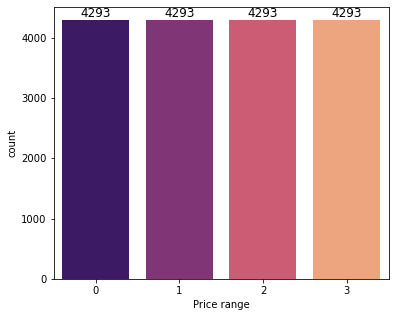

In [104]:
# Checking the count of feature 'Price range' after applying 'SMOTE'

plt.figure(figsize=(6,5))
ct = sns.countplot(y3,palette='magma')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

# Model Evaluation

In [105]:
# Checking the dimension of the data 

x3.shape

(17172, 14)

In [106]:
# Checking the dimension of the data 

y3.shape

(17172,)

In [107]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [108]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x3_train,y3_train)
    predrf = rf.predict(x3_test)
    acc = accuracy_score(y3_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 98.40838509316771 on Random State 33


## Train and Test Split

In [111]:
# Training the Model with .30 as test size and random state at 20

x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30, random_state=33)

In [112]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [113]:
GB = GaussianNB()
GB.fit(x3_train,y3_train)
print(GB.score(x3_train,y3_train))
GB_predict = GB.predict(x3_test)
cr1 = cross_val_score(GB,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y3_test,GB_predict))
print(classification_report(y3_test,GB_predict))

0.6524126455906822
Accuracy Score: 64.0527950310559
CV score of GaussianNB: 61.96734767234751
[[1209   44    7   11]
 [ 561  548   92   83]
 [  27  176  375  747]
 [   6   13   85 1168]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.79      1271
           1       0.70      0.43      0.53      1284
           2       0.67      0.28      0.40      1325
           3       0.58      0.92      0.71      1272

    accuracy                           0.64      5152
   macro avg       0.66      0.64      0.61      5152
weighted avg       0.66      0.64      0.60      5152



## LogisticRegression

In [114]:
LR = LogisticRegression()
LR.fit(x3_train,y3_train)
print(LR.score(x3_train,y3_train))
LR_predict = LR.predict(x3_test)
cr2 = cross_val_score(LR,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr2.mean()*100)
print(confusion_matrix(y3_test,LR_predict))
print(classification_report(y3_test,LR_predict))

0.5671381031613977
Accuracy Score: 55.16304347826087
CV score of LogisticRegression: 49.29623874280569
[[907 299  50  15]
 [271 679 209 125]
 [ 34 377 436 478]
 [ 12 143 297 820]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1271
           1       0.45      0.53      0.49      1284
           2       0.44      0.33      0.38      1325
           3       0.57      0.64      0.61      1272

    accuracy                           0.55      5152
   macro avg       0.55      0.55      0.55      5152
weighted avg       0.55      0.55      0.55      5152



## RandomForestClassifier

In [115]:
RFC = RandomForestClassifier()
RFC.fit(x3_train,y3_train)
print(RFC.score(x3_train,y3_train))
RFC_predict = RFC.predict(x3_test)
cr4 = cross_val_score(RFC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr4.mean()*100)
print(confusion_matrix(y3_test,RFC_predict))
print(classification_report(y3_test,RFC_predict))

1.0
Accuracy Score: 98.15605590062113
CV score of RandomForestClassifier: 93.52499493463344
[[1263    8    0    0]
 [   3 1258   22    1]
 [   1    9 1290   25]
 [   0    0   26 1246]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1271
           1       0.99      0.98      0.98      1284
           2       0.96      0.97      0.97      1325
           3       0.98      0.98      0.98      1272

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



## ExtraTreeClassifier

In [116]:
ET = ExtraTreeClassifier()
ET.fit(x3_train,y3_train)
print(ET.score(x3_train,y3_train))
ET_predict = ET.predict(x3_test)
cr5 = cross_val_score(ET,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ET_predict)*100)
print('CV score of ExtraTreeClassifier:',cr5.mean()*100)
print(confusion_matrix(y3_test,ET_predict))
print(classification_report(y3_test,ET_predict))

1.0
Accuracy Score: 77.96972049689441
CV score of ExtraTreeClassifier: 73.16589901990456
[[1077  174   14    6]
 [ 196  888  155   45]
 [  16  134  989  186]
 [   3   38  168 1063]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1271
           1       0.72      0.69      0.71      1284
           2       0.75      0.75      0.75      1325
           3       0.82      0.84      0.83      1272

    accuracy                           0.78      5152
   macro avg       0.78      0.78      0.78      5152
weighted avg       0.78      0.78      0.78      5152



## DecisionTreeClassifier

In [117]:
DTC = DecisionTreeClassifier()
DTC.fit(x3_train,y3_train)
print(DTC.score(x3_train,y3_train))
DTC_predict = DTC.predict(x3_test)
cr6 = cross_val_score(DTC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr6.mean()*100)
print(confusion_matrix(y3_test,DTC_predict))
print(classification_report(y3_test,DTC_predict))

1.0
Accuracy Score: 96.56444099378882
CV score of DecisionTreeClassifier: 92.22634516212989
[[1261   10    0    0]
 [   7 1247   28    2]
 [   1   31 1247   46]
 [   0    0   52 1220]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1271
           1       0.97      0.97      0.97      1284
           2       0.94      0.94      0.94      1325
           3       0.96      0.96      0.96      1272

    accuracy                           0.97      5152
   macro avg       0.97      0.97      0.97      5152
weighted avg       0.97      0.97      0.97      5152



## KNeighborsClassifier

In [118]:
KNC = KNeighborsClassifier()
KNC.fit(x3_train,y3_train)
print(KNC.score(x3_train,y3_train))
KNC_predict = KNC.predict(x3_test)
cr7 = cross_val_score(KNC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr7.mean()*100)
print(confusion_matrix(y3_test,KNC_predict))
print(classification_report(y3_test,KNC_predict))

0.7761231281198003
Accuracy Score: 66.05201863354037
CV score of KNeighborsClassifier: 61.91519516708928
[[ 702  293  151  125]
 [ 304  711  174   95]
 [ 126  155  932  112]
 [  91   47   76 1058]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1271
           1       0.59      0.55      0.57      1284
           2       0.70      0.70      0.70      1325
           3       0.76      0.83      0.79      1272

    accuracy                           0.66      5152
   macro avg       0.66      0.66      0.66      5152
weighted avg       0.66      0.66      0.66      5152



## GradientBoostingClassifier

In [119]:
GBC = GradientBoostingClassifier()
GBC.fit(x3_train,y3_train)
print(GBC.score(x3_train,y3_train))
GBC_predict = GBC.predict(x3_test)
cr8 = cross_val_score(GBC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr8.mean()*100)
print(confusion_matrix(y3_test,GBC_predict))
print(classification_report(y3_test,GBC_predict))

0.9795341098169718
Accuracy Score: 96.35093167701864
CV score of GradientBoostingClassifier: 94.45623396143878
[[1271    0    0    0]
 [  17 1239   28    0]
 [   2   37 1248   38]
 [   0    0   66 1206]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       0.97      0.96      0.97      1284
           2       0.93      0.94      0.94      1325
           3       0.97      0.95      0.96      1272

    accuracy                           0.96      5152
   macro avg       0.96      0.96      0.96      5152
weighted avg       0.96      0.96      0.96      5152



## AdaBoostClassifier

In [120]:
ABC = AdaBoostClassifier()
ABC.fit(x3_train,y3_train)
print(ABC.score(x3_train,y3_train))
ABC_predict = ABC.predict(x3_test)
cr9 = cross_val_score(ABC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr9.mean()*100)
print(confusion_matrix(y3_test,ABC_predict))
print(classification_report(y3_test,ABC_predict))

0.7430116472545757
Accuracy Score: 73.73835403726709
CV score of AdaBoostClassifier: 77.01433138433288
[[1271    0    0    0]
 [  33 1245    1    5]
 [   0  216  236  873]
 [   0  152   73 1047]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1271
           1       0.77      0.97      0.86      1284
           2       0.76      0.18      0.29      1325
           3       0.54      0.82      0.65      1272

    accuracy                           0.74      5152
   macro avg       0.76      0.74      0.70      5152
weighted avg       0.76      0.74      0.69      5152



## BaggingClassifier

In [121]:
BC = BaggingClassifier()
BC.fit(x3_train,y3_train)
print(BC.score(x3_train,y3_train))
BC_predict = BC.predict(x3_test)
cr10 = cross_val_score(BC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr10.mean()*100)
print(confusion_matrix(y3_test,BC_predict))
print(classification_report(y3_test,BC_predict))

0.9981697171381032
Accuracy Score: 97.55434782608695
CV score of BaggingClassifier: 93.22794318990081
[[1267    4    0    0]
 [   9 1258   16    1]
 [   1   16 1284   24]
 [   0    0   55 1217]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       0.98      0.98      0.98      1284
           2       0.95      0.97      0.96      1325
           3       0.98      0.96      0.97      1272

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



## AUC_ROC_CURVE 

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GaussianNB() 0.9055649925241932
LogisticRegression() 0.8062053182912351
RandomForestClassifier() 0.9994651339605181
ExtraTreeClassifier() 0.8535099972300227
DecisionTreeClassifier() 0.9772612587227346
KNeighborsClassifier() 0.8626407737981397
GradientBoostingClassifier() 0.9980038975155513
AdaBoostClassifier() 0.8378810845175865
BaggingClassifier() 0.9978178172963945


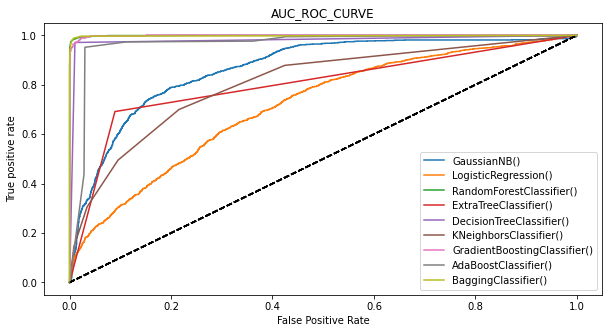

In [123]:
model = [GB,LR,RFC,ET,DTC,KNC,GBC,ABC,BC]
auc=[]


plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x3_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()


    auc_score = roc_auc_score(y3_test,i.predict_proba(x3_test),multi_class= 'ovo')
    auc.append(auc_score)
    print(i,auc_score)
plt.show()

## Based on Model evaluation and AUC_ROC_score RandomForestClassifier and Bagging classifer are performing very well.

## Hyper Parameter Tuning

### Hyper Parameter Tuning - RandomForestClassifier

In [124]:
grid_params={'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[5,10,20,50],'min_samples_split':[2,4,5],'max_features':['sqrt','log2']}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.9771214642262895
Best Params {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}


In [125]:
# Applying parameters for RandomForestClassifier

Final_Model1 = RandomForestClassifier(criterion ='entropy',max_depth = 20,max_features ='sqrt',
                                      min_samples_split=2, n_estimators=150)
                                       
Final_Model1.fit(x3_train,y3_train)
pred1 = Final_Model1.predict(x3_test)
print(Final_Model1.score(x3_train,y3_train))
cr_v1= cross_val_score(Final_Model1,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred1)*100)
print('CV score of RandomForestClassifier:',cr_v1.mean()*100)
print(confusion_matrix(y3_test,pred1))
print(classification_report(y3_test,pred1))

1.0
Accuracy_score 98.29192546583852
CV score of RandomForestClassifier: 93.3910759686295
[[1258   13    0    0]
 [   3 1260   21    0]
 [   1    8 1294   22]
 [   0    0   20 1252]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1271
           1       0.98      0.98      0.98      1284
           2       0.97      0.98      0.97      1325
           3       0.98      0.98      0.98      1272

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



### Hyper Parameter Tuning - BaggingClassifier

In [126]:
grid_params={'n_estimators':[50,100,150,200],
             'max_samples':[0.5, 0.7, 0.9],'max_features':[0.5, 0.7, 0.9,1.0,],'bootstrap':[bool,False]}
             
        
gs = GridSearchCV(BaggingClassifier(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [<class 'bool'>, False],
                         'max_features': [0.5, 0.7, 0.9, 1.0],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.9816971713810316
Best Params {'bootstrap': False, 'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 50}


In [127]:
# Applying parameters for BaggingClassifier

Final_Model2 = BaggingClassifier(bootstrap =False,max_features = 0.7,max_samples =0.9,n_estimators=50)
                                      
                                       
Final_Model2.fit(x3_train,y3_train)
pred2 = Final_Model2.predict(x3_test)
print(Final_Model2.score(x3_train,y3_train))
cr_v2= cross_val_score(Final_Model2,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred2)*100)
print('CV score of BaggingClassifier:',cr_v2.mean()*100)
print(confusion_matrix(y3_test,pred2))
print(classification_report(y3_test,pred2))

1.0
Accuracy_score 98.79658385093167
CV score of BaggingClassifier: 93.88021997678833
[[1264    5    2    0]
 [   3 1262   17    2]
 [   0    5 1306   14]
 [   0    0   14 1258]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1271
           1       0.99      0.98      0.99      1284
           2       0.98      0.99      0.98      1325
           3       0.99      0.99      0.99      1272

    accuracy                           0.99      5152
   macro avg       0.99      0.99      0.99      5152
weighted avg       0.99      0.99      0.99      5152



## AUC_ROC_Curve for Final Model

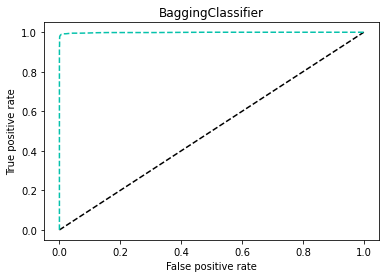

0.9994237772665896

In [129]:
# Checking roc_auc_score for RandomForestClassifier - Final Model

y_pred_prob_ = Final_Model2.predict_proba(x3_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob_,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier',linestyle='--',color='#06c2ac')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()

auc_score = roc_auc_score(y3_test,Final_Model2.predict_proba(x3_test),multi_class ='ovo')
auc_score

## Saving the Final Model

In [130]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model2,"Zomato_Restaurant_Class.pkl")

['Zomato_Restaurant_Class.pkl']

## Predicting the Model

In [131]:
# Loading the saved model

Model2=joblib.load("Zomato_Restaurant_Class.pkl")

#Prediction
prediction2 = Model2.predict(x3_test)
prediction2

array([2, 2, 0, ..., 3, 2, 0], dtype=int64)

In [132]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model2.predict(x3_test)[:],y3_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,2,2
1,2,2
2,0,0
3,0,0
4,0,0
5,0,0
6,2,2
7,3,3
8,1,1
9,0,0


## Bagging Classifier as the best fit model with Accuracy_score 99% vs CV_Score 94% vs AUC_ROC_Score 99% and below classification report which is better than other Model.


#### *****************COMPELTED*************************